# CSV Comparison Analysis

This notebook compares two CSV files to analyze differences in their values:
- `combined_stats.csv`
- `webplot_extracted.csv`

Both files should have similar columns with a Quarter column (instead of Date) organized by quarter.

In [34]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [35]:
# Load the CSV files
file1_path = r'C:\Users\clint\Desktop\Lifecycle_RA\Data\Processed\Combined_Csvs\combined_stats_quarterly.csv'
file2_path = r'C:\Users\clint\Desktop\Lifecycle_RA\Data\Processed\Combined_Csvs\webplot_extracted.csv'

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

print(f"combined_stats.csv has {df1.shape[0]} rows and {df1.shape[1]} columns")
print(f"webplot_extracted.csv has {df2.shape[0]} rows and {df2.shape[1]} columns")

combined_stats.csv has 41 rows and 49 columns
webplot_extracted.csv has 40 rows and 33 columns


In [36]:
# Function to standardize column names
def standardize_column_names(df):
    def rename_column(col):
        if '_no_outliers_' in col:
            parts = col.split('_no_outliers_')
            return f"{parts[0]}_{parts[1]}_no_outliers"
        return col
    
    df.columns = [rename_column(col) for col in df.columns]
    return df

# Apply the function to both dataframes
df1 = standardize_column_names(df1)
df2 = standardize_column_names(df2)

# Verify standardized column names
print("Standardized columns in combined_stats.csv:")
print(df1.columns)

print("\nStandardized columns in webplot_extracted.csv:")
print(df2.columns)

Standardized columns in combined_stats.csv:
Index(['Quarter', '2YO_mean', '2YO_median', '2YO_min', '2YO_max', '2YO_mean_no_extremes', '2YO_median_no_extremes', '2YO_mean_no_outliers', '2YO_median_no_outliers', '2YO_min_no_outliers', '2YO_max_no_outliers', '2YO_mean_no_extremes_no_outliers', '2YO_median_no_extremes_no_outliers', '3YO_mean', '3YO_median', '3YO_min', '3YO_max', '3YO_mean_no_extremes', '3YO_median_no_extremes', '3YO_mean_no_outliers', '3YO_median_no_outliers', '3YO_min_no_outliers', '3YO_max_no_outliers', '3YO_mean_no_extremes_no_outliers', '3YO_median_no_extremes_no_outliers', '4YO_mean', '4YO_median', '4YO_min', '4YO_max', '4YO_mean_no_extremes', '4YO_median_no_extremes', '4YO_mean_no_outliers', '4YO_median_no_outliers', '4YO_min_no_outliers', '4YO_max_no_outliers', '4YO_mean_no_extremes_no_outliers', '4YO_median_no_extremes_no_outliers', '5YO_mean', '5YO_median', '5YO_min', '5YO_max', '5YO_mean_no_extremes', '5YO_median_no_extremes', '5YO_mean_no_outliers', '5YO_median_

In [37]:
# Review the first few rows of each dataset
print("First 5 rows of combined_stats.csv:")
display(df1.head())

print("\nFirst 5 rows of webplot_extracted.csv:")
display(df2.head())

First 5 rows of combined_stats.csv:


Quarter  2YO_mean  2YO_median  2YO_min   2YO_max  2YO_mean_no_extremes  2YO_median_no_extremes  2YO_mean_no_outliers  2YO_median_no_outliers  2YO_min_no_outliers  2YO_max_no_outliers  2YO_mean_no_extremes_no_outliers  2YO_median_no_extremes_no_outliers  3YO_mean  3YO_median  3YO_min  3YO_max  3YO_mean_no_extremes  3YO_median_no_extremes  3YO_mean_no_outliers  3YO_median_no_outliers  3YO_min_no_outliers  3YO_max_no_outliers  3YO_mean_no_extremes_no_outliers  3YO_median_no_extremes_no_outliers      4YO_mean  4YO_median  4YO_min  4YO_max  4YO_mean_no_extremes  4YO_median_no_extremes  4YO_mean_no_outliers  4YO_median_no_outliers  4YO_min_no_outliers  4YO_max_no_outliers  4YO_mean_no_extremes_no_outliers  4YO_median_no_extremes_no_outliers      5YO_mean  5YO_median  5YO_min  5YO_max  5YO_mean_no_extremes  5YO_median_no_extremes  5YO_mean_no_outliers  5YO_median_no_outliers  5YO_min_no_outliers  5YO_max_no_outliers  5YO_mean_no_extremes_no_outliers  5YO_median_no_extremes_no_outliers
0  2015Q1       NaN         NaN      NaN       NaN                   NaN                     NaN                   NaN                     NaN                  NaN                  NaN                               NaN                                 NaN       NaN         NaN      NaN      NaN                   NaN                     NaN                   NaN                     NaN                  NaN                  NaN                               NaN                                 NaN  75100.000000     74500.0  71900.0  79700.0          74983.333333                 74500.0          75100.000000                 74500.0              71900.0              79700.0                      74983.333333                             74500.0  66192.857143     66700.0  62000.0  70000.0          66450.000000                 66700.0          66192.857143                 66700.0              62000.0              70000.0                      66450.000000                             66700.0
1  2015Q2       NaN         NaN      NaN       NaN                   NaN                     NaN                   NaN                     NaN                  NaN                  NaN                               NaN                                 NaN       NaN         NaN      NaN      NaN                   NaN                     NaN                   NaN                     NaN                  NaN                  NaN                               NaN                                 NaN  71210.000000     71000.0  70000.0  72000.0          71157.142857                 71000.0          71210.000000                 71000.0              70000.0              72000.0                      71157.142857                             71000.0  62720.000000     63250.0  61000.0  64000.0          62100.000000                 62100.0          62720.000000                 63250.0              61000.0              64000.0                      62100.000000                             62100.0
2  2015Q3       NaN         NaN      NaN       NaN                   NaN                     NaN                   NaN                     NaN                  NaN                  NaN                               NaN                                 NaN       NaN         NaN      NaN      NaN                   NaN                     NaN                   NaN                     NaN                  NaN                  NaN                               NaN                                 NaN  70271.428571     70000.0  68300.0  73000.0          70208.333333                 70000.0          70271.428571                 70000.0              68300.0              73000.0                      70208.333333                             70000.0  59592.857143     59400.0  57500.0  63000.0          59483.333333                 59400.0          59592.857143                 59400.0              57500.0              63000.0                      59483.333333                             59400.0
3  2015Q4       NaN   


First 5 rows of webplot_extracted.csv:


Quarter       2YO_mean    2YO_median       2YO_min       2YO_max  2YO_mean_no_extremes  2YO_median_no_extremes  2YO_mean_no_outliers  2YO_median_no_outliers      3YO_mean    3YO_median       3YO_min       3YO_max  3YO_mean_no_extremes  3YO_median_no_extremes  3YO_mean_no_outliers  3YO_median_no_outliers      4YO_mean    4YO_median       4YO_min       4YO_max  4YO_mean_no_extremes  4YO_median_no_extremes  4YO_mean_no_outliers  4YO_median_no_outliers      5YO_mean    5YO_median       5YO_min       5YO_max  5YO_mean_no_extremes  5YO_median_no_extremes  5YO_mean_no_outliers  5YO_median_no_outliers
0  2015Q1            NaN           NaN           NaN           NaN                   NaN                     NaN                   NaN                     NaN  85439.935491  83745.404766  82481.537517  92092.885611          85176.038909            83745.404766          85439.935491            83745.404766  72738.010789  72239.543855  70500.583596  77306.593205          72543.747853            72239.543855          72386.581372            72031.303713  63983.307411  63180.581862  61399.666675  68710.037515          63830.229599            63180.581862          63983.307411            63180.581862
1  2015Q2            NaN           NaN           NaN           NaN                   NaN                     NaN                   NaN                     NaN  78351.575737  78430.100852  75190.982315  82463.814212          78288.132734            78430.100852          78351.575737            78430.100852  72136.576152  71669.583229  70518.306900  74293.370784          72098.110053            71669.583229          72136.576152            71669.583229  62883.816897  62474.017045  61243.480053  64862.357314          62859.659499            62474.017045          62883.816897            62474.017045
2  2015Q3            NaN           NaN           NaN           NaN                   NaN                     NaN                   NaN                     NaN  78051.486007  78789.551624  75330.184104  80124.338003          78094.716001            78789.551624          78051.486007            78789.551624  68696.224748  69029.549312  65990.002570  70930.373732          68732.538071            69029.549312          68889.526332            69038.410965  59029.743362  59007.864518  57376.476526  61010.344750          59006.362323            59007.864518          59029.743362            59007.864518
3  2015Q4            NaN           NaN           NaN           NaN                   NaN                     NaN                   NaN                     NaN  74165.322882  74202.502648  71670.598627  76810.080039          74152.820140            74202.502648          74165.322882            74202.502648  62600.422269  62558.216943  60562.240531  65553.843121          62524.152343            62558.216943          62600.422269            62558.216943  55578.482057  55489.366568  53597.535670  58014.515493          55537.110507            55489.366568          55578.482057            55489.366568
4  2016Q1  104209.694299  103849.84921  94516.656831  113023.57915          104233.45518            103849.84921         104209.694299            103849.84921  82602.789826  81093.973822  75563.836336  92527.766197          82528.789240            81093.973822          82602.789826            81093.973822  67111.732238  67042.434909  64315.150284  69968.884457          67109.896775            67042.434909          67111.732238            67042.434909  53392.495896  54109.654466  45273.091882  57571.609327          53511.898641            54109.654466          53631.301896            54354.863047

In [38]:
# Compare column names and data types
df1_cols = set(df1.columns)
df2_cols = set(df2.columns)

common_cols = df1_cols.intersection(df2_cols)
unique_to_df1 = df1_cols - df2_cols
unique_to_df2 = df2_cols - df1_cols

print(f"Common columns: {len(common_cols)}")
print(f"Columns only in combined_stats.csv: {len(unique_to_df1)}")
print(f"Columns only in webplot_extracted.csv: {len(unique_to_df2)}")

print("\nCommon columns:")
print(sorted(common_cols))

print("\nColumns only in combined_stats.csv:")
print(sorted(unique_to_df1))

print("\nColumns only in webplot_extracted.csv:")
print(sorted(unique_to_df2))

Common columns: 33
Columns only in combined_stats.csv: 16
Columns only in webplot_extracted.csv: 0

Common columns:
['2YO_max', '2YO_mean', '2YO_mean_no_extremes', '2YO_mean_no_outliers', '2YO_median', '2YO_median_no_extremes', '2YO_median_no_outliers', '2YO_min', '3YO_max', '3YO_mean', '3YO_mean_no_extremes', '3YO_mean_no_outliers', '3YO_median', '3YO_median_no_extremes', '3YO_median_no_outliers', '3YO_min', '4YO_max', '4YO_mean', '4YO_mean_no_extremes', '4YO_mean_no_outliers', '4YO_median', '4YO_median_no_extremes', '4YO_median_no_outliers', '4YO_min', '5YO_max', '5YO_mean', '5YO_mean_no_extremes', '5YO_mean_no_outliers', '5YO_median', '5YO_median_no_extremes', '5YO_median_no_outliers', '5YO_min', 'Quarter']

Columns only in combined_stats.csv:
['2YO_max_no_outliers', '2YO_mean_no_extremes_no_outliers', '2YO_median_no_extremes_no_outliers', '2YO_min_no_outliers', '3YO_max_no_outliers', '3YO_mean_no_extremes_no_outliers', '3YO_median_no_extremes_no_outliers', '3YO_min_no_outliers', '4

In [39]:
# Check Quarter column in both files
# Ensure Quarter column formatting is consistent for comparison
if 'Quarter' in common_cols:
    print("Quarter values in combined_stats.csv:")
    print(df1['Quarter'].value_counts().sort_index().head())
    
    print("\nQuarter values in webplot_extracted.csv:")
    print(df2['Quarter'].value_counts().sort_index().head())
    
    # Convert Quarter to datetime if needed
    try:
        # Optional: Convert 'YYYYQN' format to a datetime if needed for sorting
        # For now, we'll use string comparison since the Quarter format is consistent
        pass
    except Exception as e:
        print(f"Error converting quarters: {e}")
        print("Will use string comparison instead")

Quarter values in combined_stats.csv:
Quarter
2015Q1    1
2015Q2    1
2015Q3    1
2015Q4    1
2016Q1    1
Name: count, dtype: int64

Quarter values in webplot_extracted.csv:
Quarter
2015Q1    1
2015Q2    1
2015Q3    1
2015Q4    1
2016Q1    1
Name: count, dtype: int64


In [40]:
# Merge datasets on Quarter column to compare values side by side
if 'Quarter' in common_cols:
    # Create suffixes to distinguish between the two datasets
    merged_df = pd.merge(df1, df2, on='Quarter', how='outer', suffixes=('_stats', '_webplot'))
    
    print(f"Merged dataframe has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns")
    display(merged_df.head())
    
    # Check for nulls that might indicate mismatches
    null_counts = merged_df.isnull().sum()
    print("\nNull counts for each column (potential mismatches):")
    print(null_counts[null_counts > 0])

Merged dataframe has 41 rows and 81 columns


Quarter  2YO_mean_stats  2YO_median_stats  2YO_min_stats  2YO_max_stats  2YO_mean_no_extremes_stats  2YO_median_no_extremes_stats  2YO_mean_no_outliers_stats  2YO_median_no_outliers_stats  2YO_min_no_outliers  2YO_max_no_outliers  2YO_mean_no_extremes_no_outliers  2YO_median_no_extremes_no_outliers  3YO_mean_stats  3YO_median_stats  3YO_min_stats  3YO_max_stats  3YO_mean_no_extremes_stats  3YO_median_no_extremes_stats  3YO_mean_no_outliers_stats  3YO_median_no_outliers_stats  3YO_min_no_outliers  3YO_max_no_outliers  3YO_mean_no_extremes_no_outliers  3YO_median_no_extremes_no_outliers  4YO_mean_stats  4YO_median_stats  4YO_min_stats  4YO_max_stats  4YO_mean_no_extremes_stats  4YO_median_no_extremes_stats  4YO_mean_no_outliers_stats  4YO_median_no_outliers_stats  4YO_min_no_outliers  4YO_max_no_outliers  4YO_mean_no_extremes_no_outliers  4YO_median_no_extremes_no_outliers  5YO_mean_stats  5YO_median_stats  5YO_min_stats  5YO_max_stats  5YO_mean_no_extremes_stats  \
0  2015Q1             NaN               NaN            NaN            NaN                         NaN                           NaN                         NaN                           NaN                  NaN                  NaN                               NaN                                 NaN             NaN               NaN            NaN            NaN                         NaN                           NaN                         NaN                           NaN                  NaN                  NaN                               NaN                                 NaN    75100.000000           74500.0        71900.0        79700.0                74983.333333                       74500.0                75100.000000                       74500.0              71900.0              79700.0                      74983.333333                             74500.0    66192.857143           66700.0        62000.0        70000.0                66450.000000   
1  2015Q2             NaN               NaN            NaN            NaN                         NaN                           NaN                         NaN                           NaN                  NaN                  NaN                               NaN                                 NaN             NaN               NaN            NaN            NaN                         NaN                           NaN                         NaN                           NaN                  NaN                  NaN                               NaN                                 NaN    71210.000000           71000.0        70000.0        72000.0                71157.142857                       71000.0                71210.000000                       71000.0              70000.0              72000.0                      71157.142857                             71000.0    62720.000000           63250.0        61000.0        64000.0                62100.000000   
2  2015Q3             NaN               NaN            NaN            NaN                         NaN                           NaN                         NaN                           NaN                  NaN                  NaN                               NaN                                 NaN             NaN               NaN            NaN            NaN                         NaN                           NaN                         NaN                           NaN                  NaN                  NaN                               NaN                                 NaN    70271.428571           70000.0        68300.0        73000.0                70208.333333                       70000.0                70271.428571                       70000.0              68300.0              73000.0                      70208.333333                             70000.0    59592.857143           59400.0        57500.0        63000.0                59483.333333   
3  2015Q4             NaN               NaN            NaN            NaN     


Null counts for each column (potential mismatches):
2YO_mean_stats                    26
2YO_median_stats                  26
2YO_min_stats                     26
2YO_max_stats                     26
2YO_mean_no_extremes_stats        41
                                  ..
5YO_max_webplot                    1
5YO_mean_no_extremes_webplot       1
5YO_median_no_extremes_webplot     1
5YO_mean_no_outliers_webplot       1
5YO_median_no_outliers_webplot     1
Length: 72, dtype: int64


In [41]:
# Compare values for common numeric columns, including 'no_outliers' columns
comparison_results = []

for col in common_cols:
    if col == 'Quarter':
        continue  # Skip Quarter column as it's used for merging
        
    if pd.api.types.is_numeric_dtype(df1[col]) and pd.api.types.is_numeric_dtype(df2[col]):
        # Only include rows where both dataframes have the quarter
        common_quarters = set(df1['Quarter']).intersection(set(df2['Quarter']))
        df1_filtered = df1[df1['Quarter'].isin(common_quarters)]
        df2_filtered = df2[df2['Quarter'].isin(common_quarters)]
        
        # Sort by Quarter to ensure alignment
        df1_filtered = df1_filtered.sort_values('Quarter')
        df2_filtered = df2_filtered.sort_values('Quarter')
        
        # Calculate differences and statistics
        abs_diff = np.abs(df1_filtered[col].values - df2_filtered[col].values)
        rel_diff = abs_diff / np.abs(df1_filtered[col].values)
        rel_diff = np.where(np.isfinite(rel_diff), rel_diff, 0)  # Handle division by zero
        
        comparison_results.append({
            'Column': col,
            'Mean Absolute Difference': np.mean(abs_diff),
            'Max Absolute Difference': np.max(abs_diff),
            'Mean Relative Difference (%)': np.mean(rel_diff) * 100,
            'Identical Values (%)': (abs_diff == 0).mean() * 100
        })

# Filter results to include 'no_outliers' columns
no_outliers_results = [result for result in comparison_results if 'no_outliers' in result['Column']]

comparison_df = pd.DataFrame(comparison_results)
no_outliers_df = pd.DataFrame(no_outliers_results)

if not comparison_df.empty:
    comparison_df = comparison_df.sort_values('Mean Relative Difference (%)', ascending=False)
    display(comparison_df)
else:
    print("No numeric columns were compared. Check if there are matching numeric columns in both files.")

if not no_outliers_df.empty:
    no_outliers_df = no_outliers_df.sort_values('Mean Relative Difference (%)', ascending=False)
    print("\nComparison results for 'no_outliers' columns:")
    display(no_outliers_df)
else:
    print("No 'no_outliers' columns were found in the comparison results.")

Column  Mean Absolute Difference  Max Absolute Difference  Mean Relative Difference (%)  Identical Values (%)
24                 5YO_max               6957.239322             23754.686493                      9.982262                   0.0
29                 5YO_min               4686.509070             34934.528688                      9.505431                   0.0
16                 4YO_max               7526.157001             32103.167813                      9.072080                   0.0
7                  4YO_min               5642.985512             33391.513045                      8.816957                   0.0
19                 3YO_max                       NaN                      NaN                      7.350912                   0.0
18                 3YO_min                       NaN                      NaN                      5.976376                   0.0
6               4YO_median               4804.438232             23091.301540                      5.975824                   0.0
26  4YO_median_no_outliers                       NaN                      NaN                      5.908499                   0.0
5                 4YO_mean               4613.473171             20927.903001                      5.663784                   0.0
14    4YO_mean_no_outliers                       NaN                      NaN                      5.638956                   0.0
25    4YO_mean_no_extremes                       NaN                      NaN                      5.035047                   0.0
28  4YO_median_no_extremes                       NaN                      NaN                      4.829148                   0.0
31                3YO_mean                       NaN                      NaN                      4.647342                   0.0
10              3YO_median                       NaN                      NaN                      4.634626                   0.0
9     3YO_mean_no_outliers                       NaN                      NaN                      4.557092                   0.0
20    5YO_mean_no_outliers                       NaN                      NaN                      4.548584                   0.0
0               5YO_median               3114.336755             21031.214690                      4.537674                   0.0
30  5YO_median_no_outliers                       NaN                      NaN                      4.514742                   0.0
8                 5YO_mean               3147.486035             17811.537759                      4.458010                   0.0
23  3YO_median_no_outliers                       NaN                      NaN                      4.457462                   0.0
21    5YO_mean_no_extremes                       NaN                      NaN                      4.014320                   0.0
22  5YO_median_no_extremes                       NaN                      NaN                      3.861732                   0.0
11                 2YO_max                       NaN                      NaN                      3.521317                   0.0
3   3YO_median_no_extremes                       NaN                      NaN                      3.157235                   0.0
4     3YO_mean_no_extremes                       NaN                      NaN                      3.031737                   0.0
13                 2YO_min                       NaN                      NaN                      2.601748                   0.0
27                2YO_mean                       NaN                      NaN                      2.087075                   0.0
2               2YO_median                       NaN                      NaN                      1.996837                   0.0
1     2YO_mean_no_outliers                       NaN                      NaN                      1.980778                   0.0
12  2YO_median_no_outliers                       NaN                      NaN                      1.863462             


Comparison results for 'no_outliers' columns:


Column  Mean Absolute Difference  Max Absolute Difference  Mean Relative Difference (%)  Identical Values (%)
6  4YO_median_no_outliers                       NaN                      NaN                      5.908499                   0.0
3    4YO_mean_no_outliers                       NaN                      NaN                      5.638956                   0.0
1    3YO_mean_no_outliers                       NaN                      NaN                      4.557092                   0.0
4    5YO_mean_no_outliers                       NaN                      NaN                      4.548584                   0.0
7  5YO_median_no_outliers                       NaN                      NaN                      4.514742                   0.0
5  3YO_median_no_outliers                       NaN                      NaN                      4.457462                   0.0
0    2YO_mean_no_outliers                       NaN                      NaN                      1.980778                   0.0
2  2YO_median_no_outliers                       NaN                      NaN                      1.863462                   0.0

In [42]:
# Analyze columns with 'no_outliers' in their names
no_outliers_cols = [col for col in common_cols if 'no_outliers' in col]

if no_outliers_cols:
    print(f"Found {len(no_outliers_cols)} columns with 'no_outliers' in their names:")
    print(no_outliers_cols)

    # Iterate through each 'no_outliers' column and calculate differences
    for col in no_outliers_cols:
        if pd.api.types.is_numeric_dtype(df1[col]) and pd.api.types.is_numeric_dtype(df2[col]):
            common_quarters = set(df1['Quarter']).intersection(set(df2['Quarter']))
            df1_filtered = df1[df1['Quarter'].isin(common_quarters)].sort_values('Quarter')
            df2_filtered = df2[df2['Quarter'].isin(common_quarters)].sort_values('Quarter')

            abs_diff = np.abs(df1_filtered[col].values - df2_filtered[col].values)
            rel_diff = abs_diff / np.abs(df1_filtered[col].values)
            rel_diff = np.where(np.isfinite(rel_diff), rel_diff, 0)

            print(f"\nAnalysis for column: {col}")
            print(f"Mean Absolute Difference: {np.mean(abs_diff):.2f}")
            print(f"Max Absolute Difference: {np.max(abs_diff):.2f}")
            print(f"Mean Relative Difference (%): {np.mean(rel_diff) * 100:.2f}")
            print(f"Identical Values (%): {(abs_diff == 0).mean() * 100:.2f}")

else:
    print("No columns with 'no_outliers' found in the datasets.")

Found 8 columns with 'no_outliers' in their names:
['2YO_mean_no_outliers', '3YO_mean_no_outliers', '2YO_median_no_outliers', '4YO_mean_no_outliers', '5YO_mean_no_outliers', '3YO_median_no_outliers', '4YO_median_no_outliers', '5YO_median_no_outliers']

Analysis for column: 2YO_mean_no_outliers
Mean Absolute Difference: nan
Max Absolute Difference: nan
Mean Relative Difference (%): 1.98
Identical Values (%): 0.00

Analysis for column: 3YO_mean_no_outliers
Mean Absolute Difference: nan
Max Absolute Difference: nan
Mean Relative Difference (%): 4.56
Identical Values (%): 0.00

Analysis for column: 2YO_median_no_outliers
Mean Absolute Difference: nan
Max Absolute Difference: nan
Mean Relative Difference (%): 1.86
Identical Values (%): 0.00

Analysis for column: 4YO_mean_no_outliers
Mean Absolute Difference: nan
Max Absolute Difference: nan
Mean Relative Difference (%): 5.64
Identical Values (%): 0.00

Analysis for column: 5YO_mean_no_outliers
Mean Absolute Difference: nan
Max Absolute Diff

Visualizing differences for 8 'no_extremes' columns


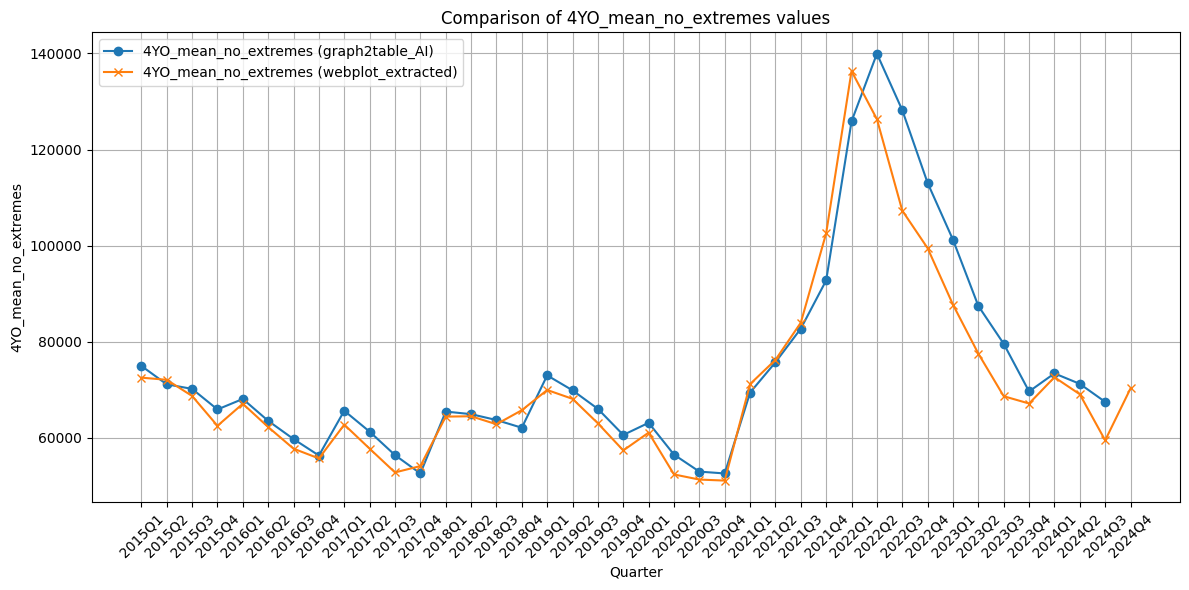

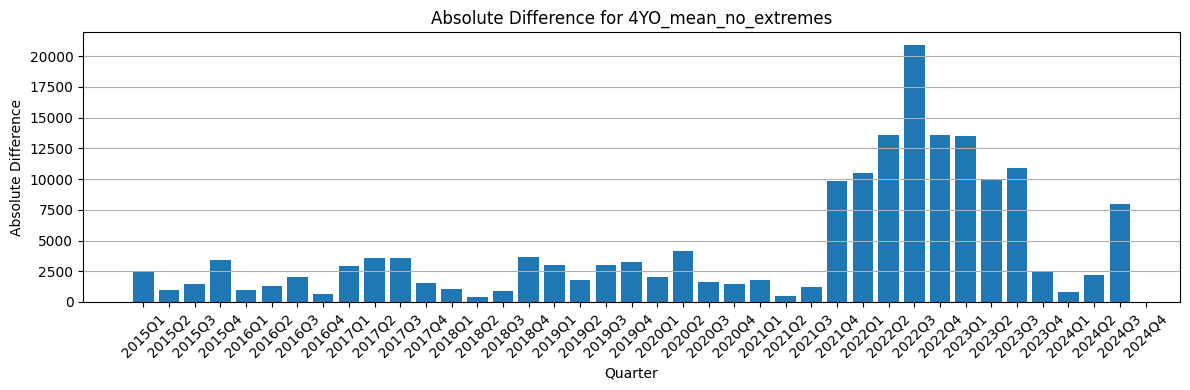

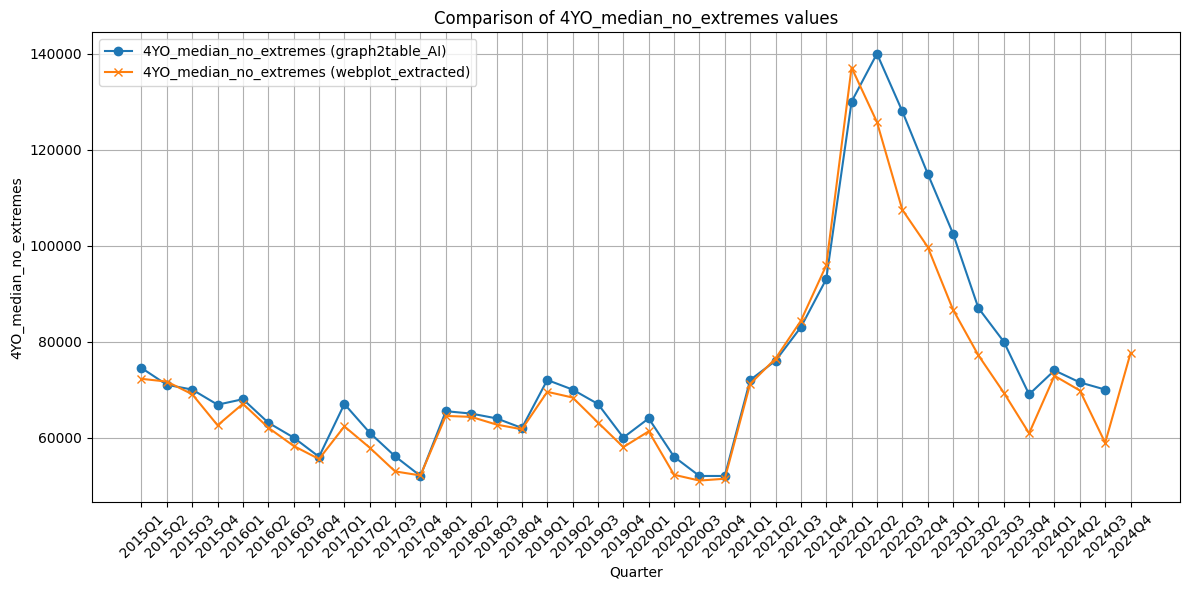

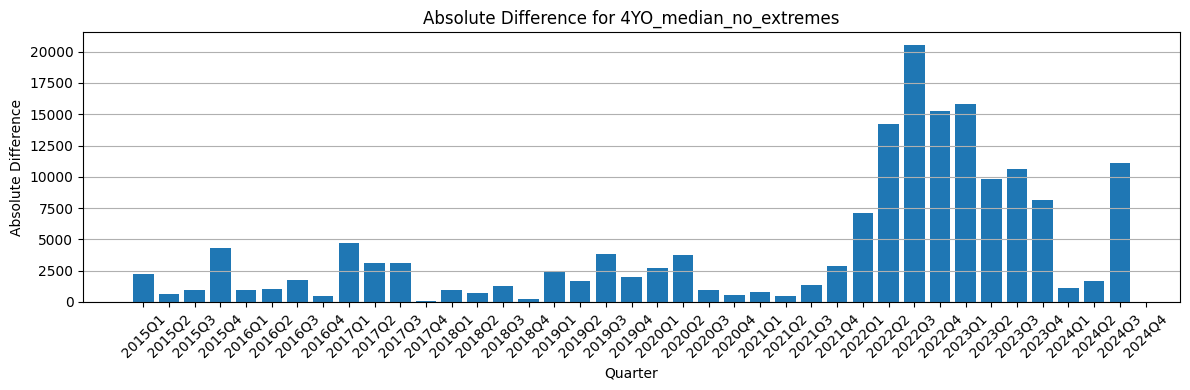

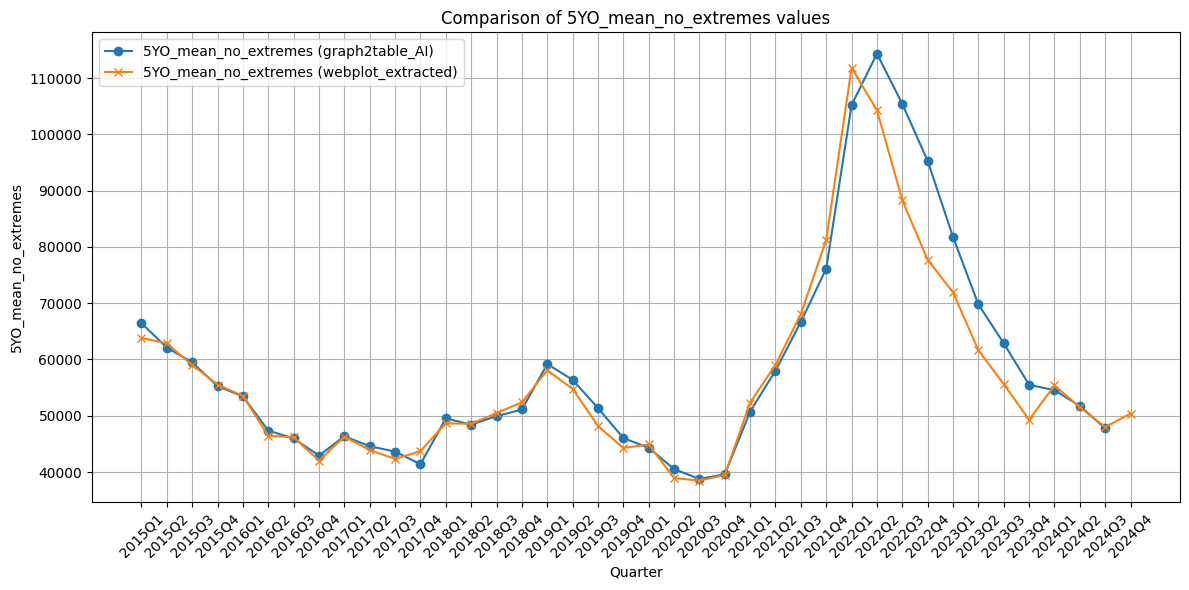

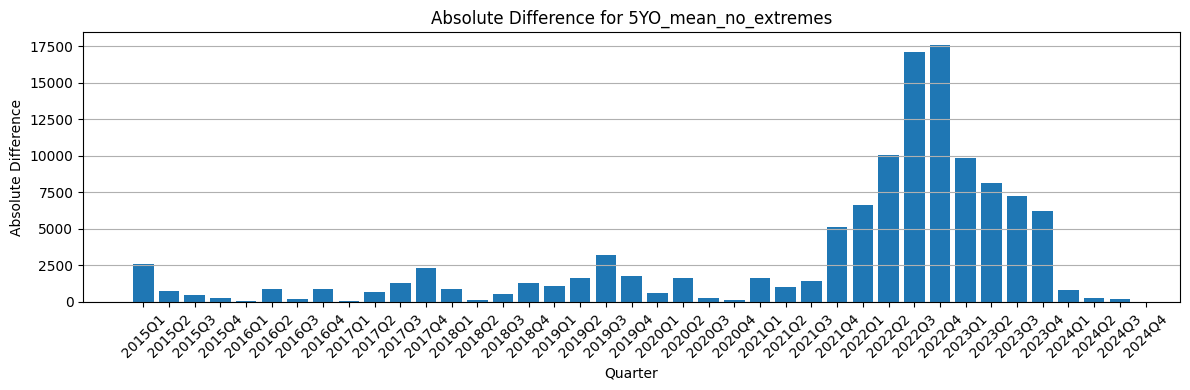

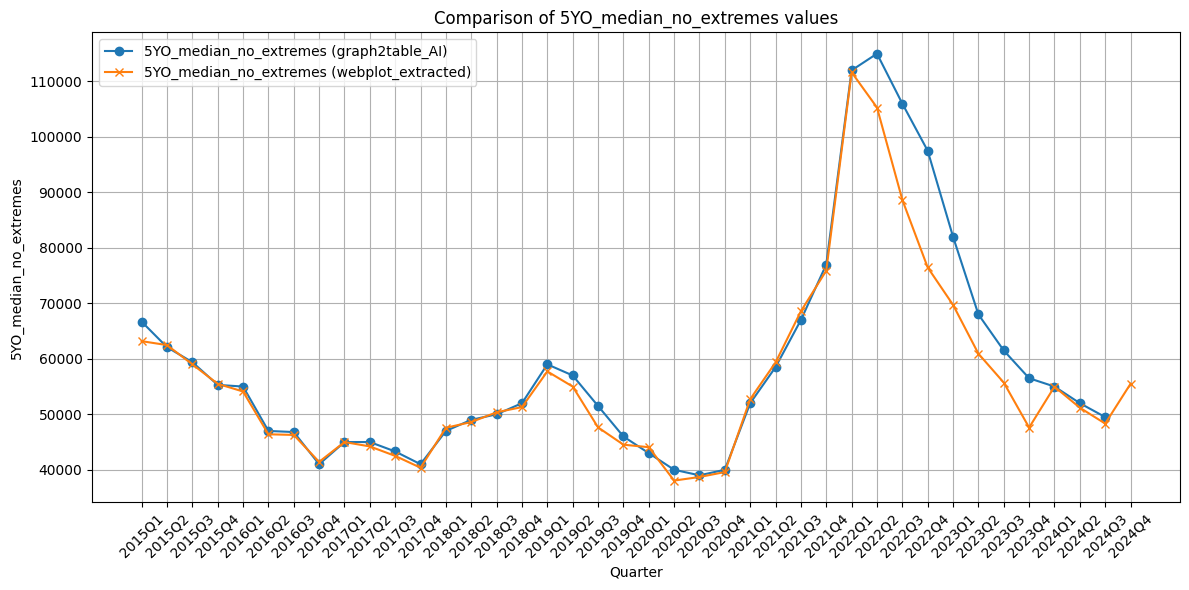

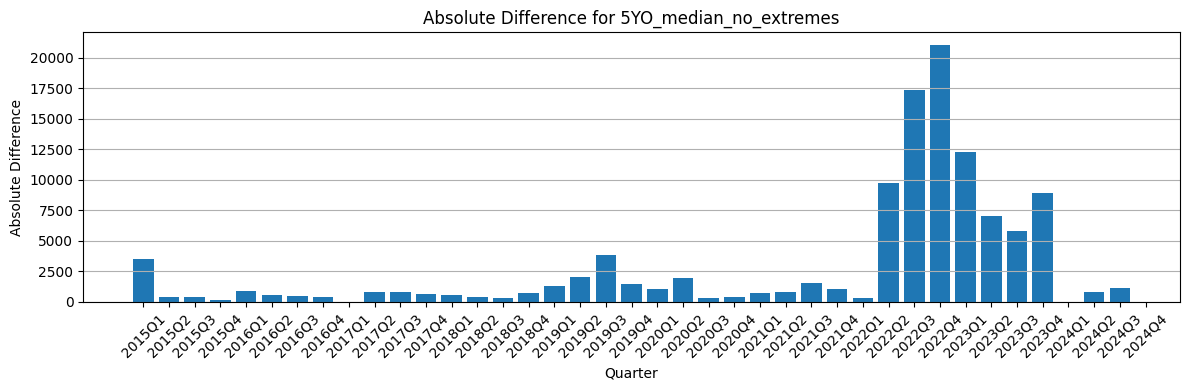

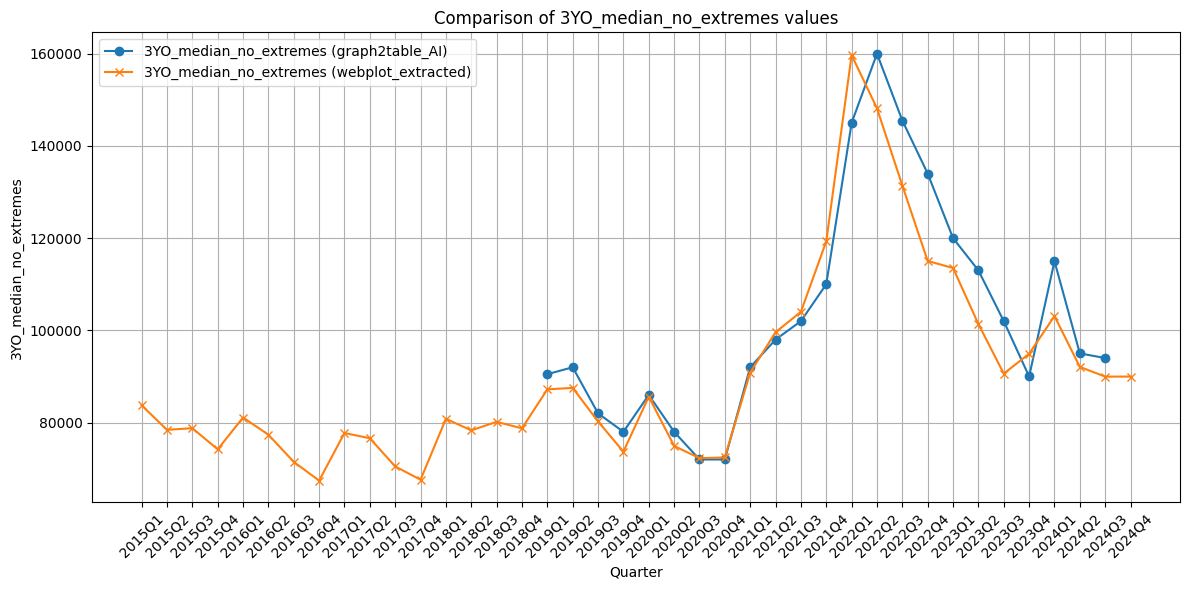

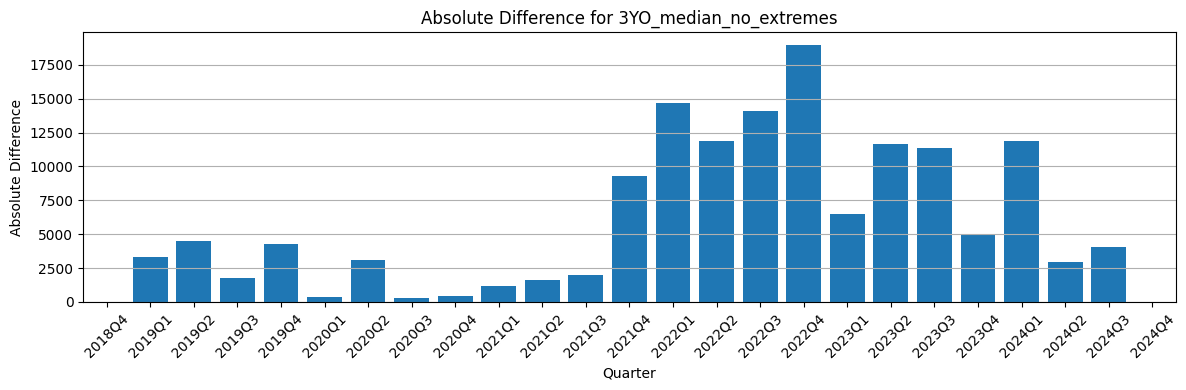

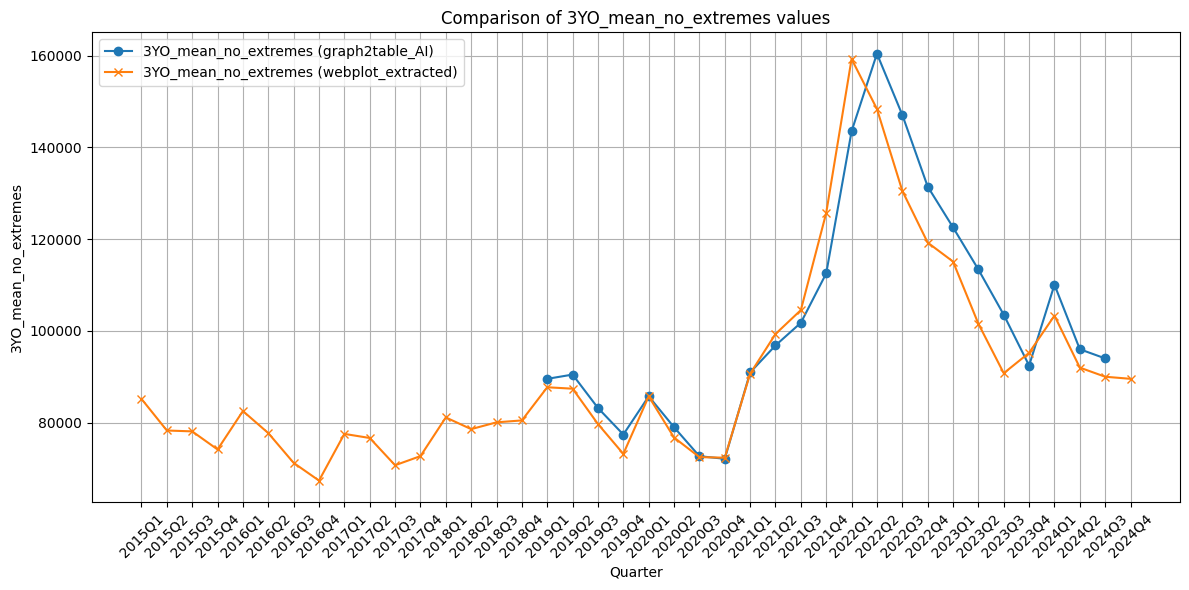

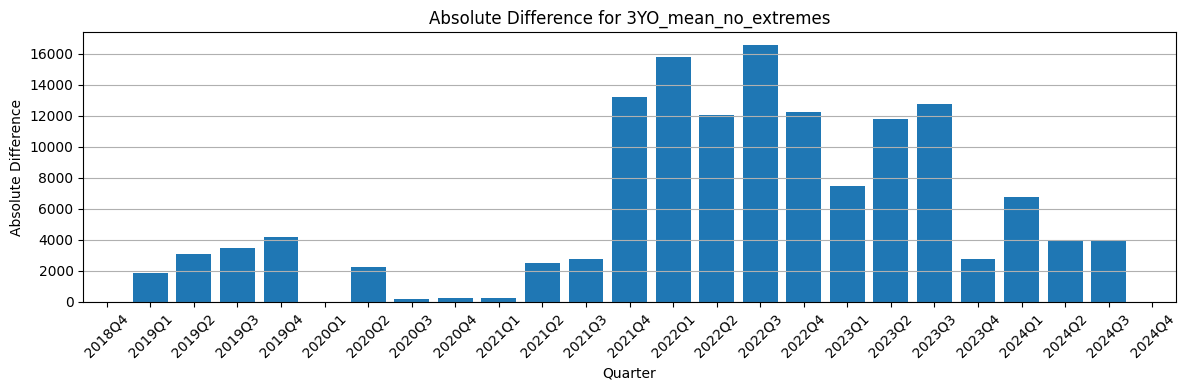

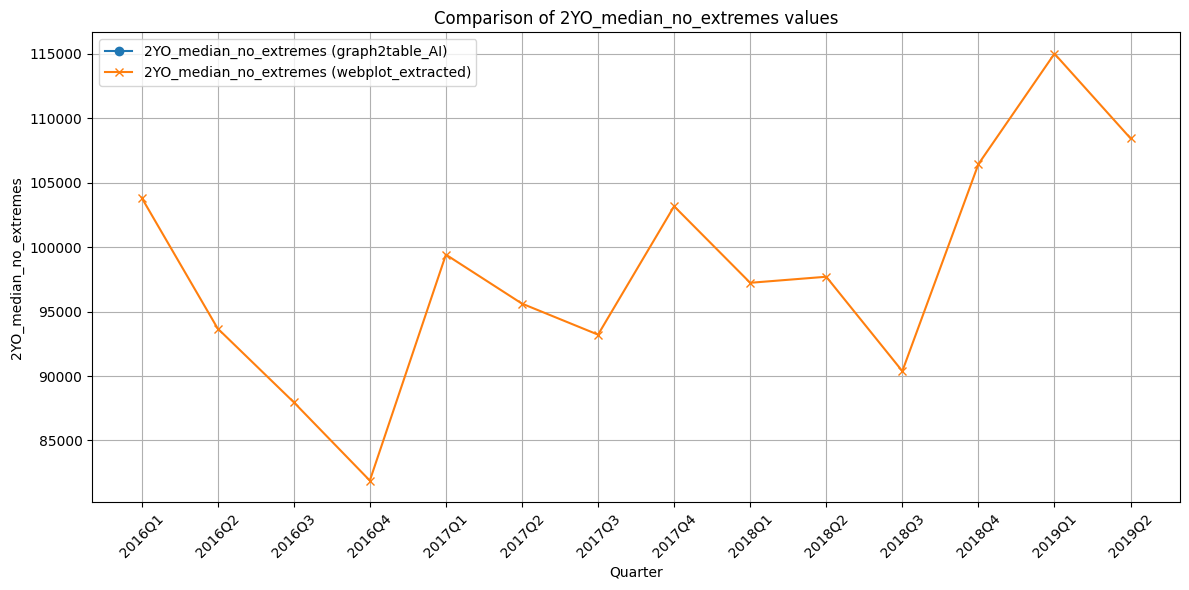

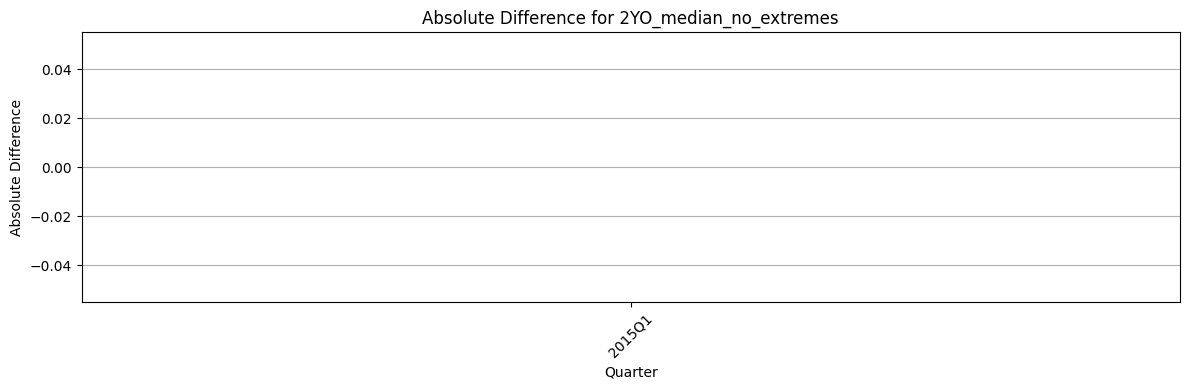

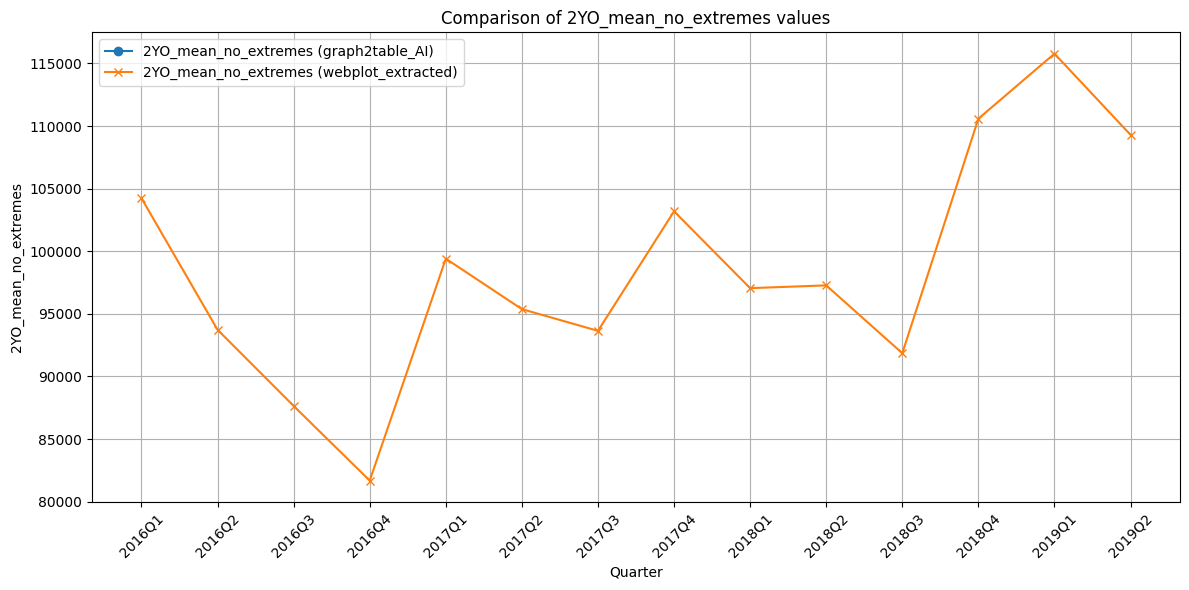

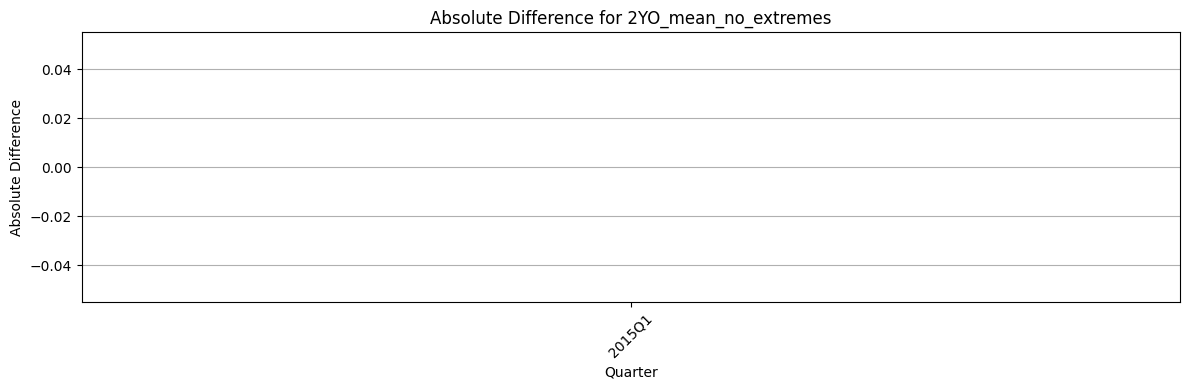

In [43]:
# Visualize differences only for 'no_extremes' columns
if len(comparison_results) > 0:
    # Filter comparison_df to only include columns with 'no_extremes' in their names
    no_extremes_cols = [col for col in comparison_df['Column'].values if 'no_extremes' in col]
    
    if len(no_extremes_cols) > 0:
        print(f"Visualizing differences for {len(no_extremes_cols)} 'no_extremes' columns")
        
        # Iterate through filtered columns with discrepancies
        for col in no_extremes_cols:
            plt.figure(figsize=(12, 6))
            
            # Filter to common quarters and sort
            common_quarters = set(df1['Quarter']).intersection(set(df2['Quarter']))
            df1_filtered = df1[df1['Quarter'].isin(common_quarters)].sort_values('Quarter')
            df2_filtered = df2[df2['Quarter'].isin(common_quarters)].sort_values('Quarter')
            
            quarters = df1_filtered['Quarter']
            
            # Plot the values from both dataframes
            plt.plot(quarters, df1_filtered[col], label=f'{col} (graph2table_AI)', marker='o')
            plt.plot(quarters, df2_filtered[col], label=f'{col} (webplot_extracted)', marker='x')

            
            plt.title(f'Comparison of {col} values')
            plt.xlabel('Quarter')
            plt.ylabel(col)
            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Plot the absolute differences
            abs_diff = np.abs(df1_filtered[col].values - df2_filtered[col].values)
            
            plt.figure(figsize=(12, 4))
            plt.bar(quarters, abs_diff)
            plt.title(f'Absolute Difference for {col}')
            plt.xlabel('Quarter')
            plt.ylabel('Absolute Difference')
            plt.xticks(rotation=45)
            plt.grid(True, axis='y')
            plt.tight_layout()
            plt.show()
    else:
        print("No 'no_extremes' columns found in the comparison results.")
else:
    print("No comparison results available for visualization.")

Visualizing differences for 8 'no_outliers' columns


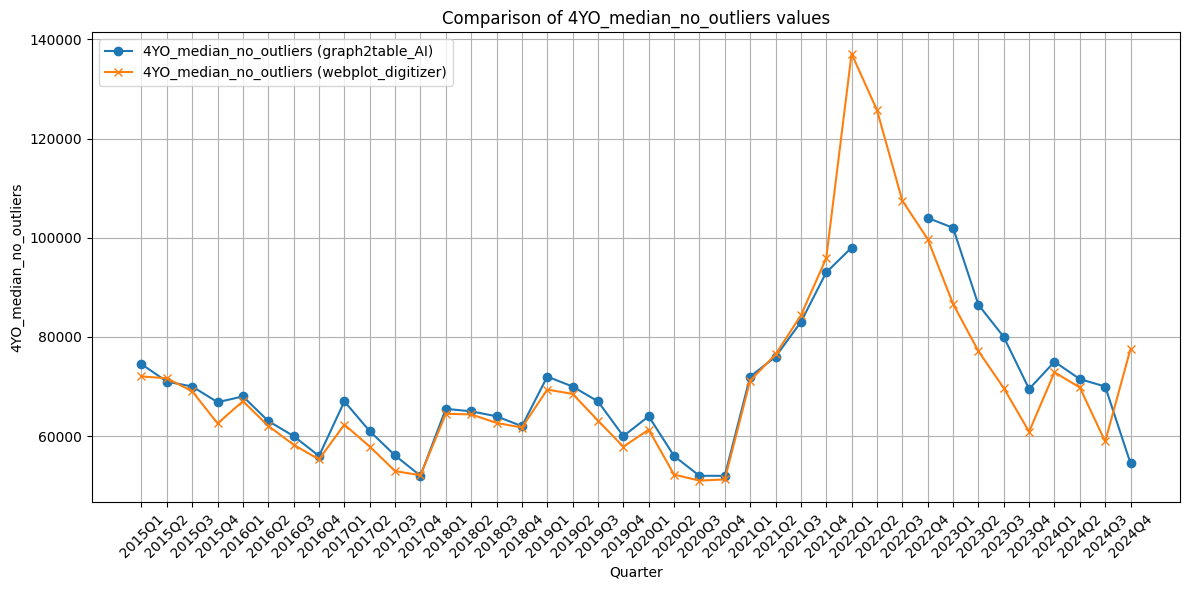

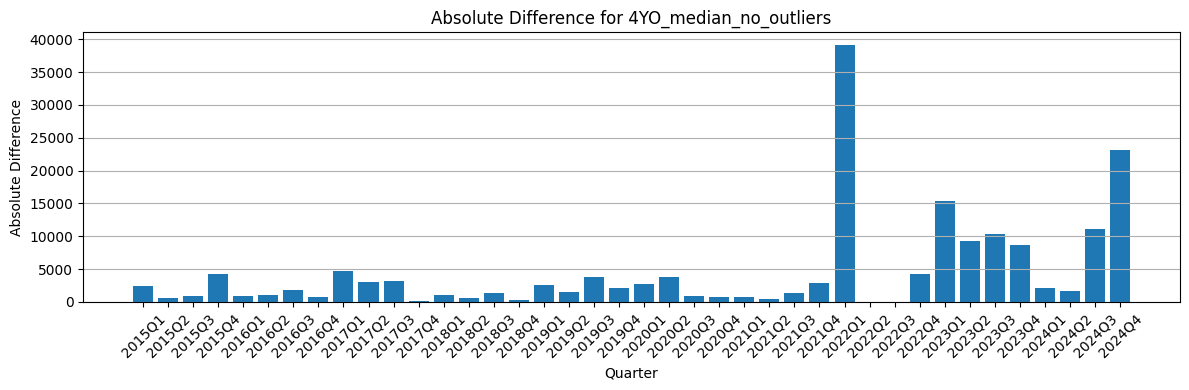

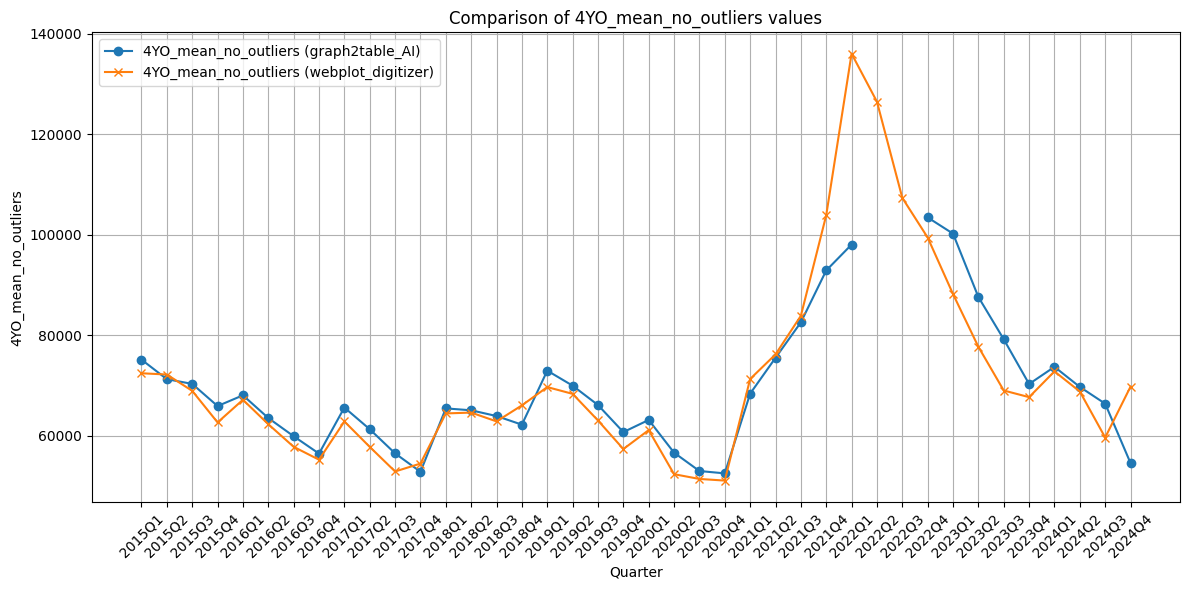

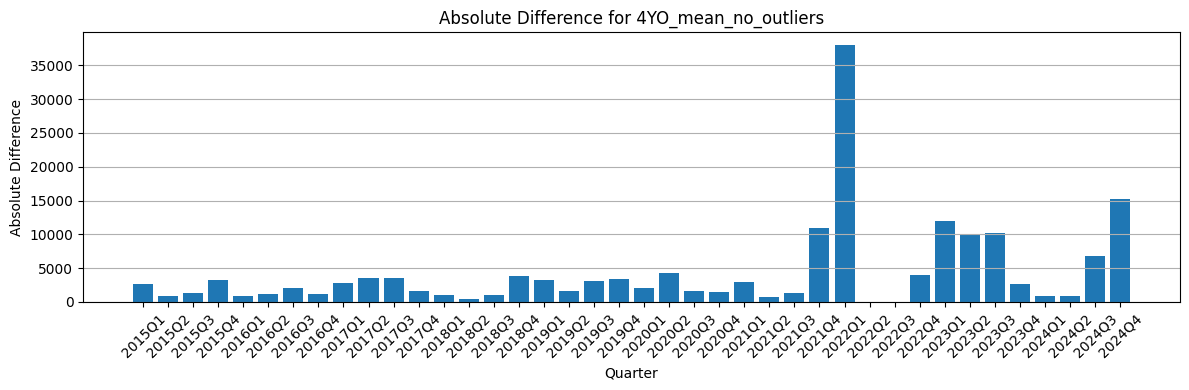

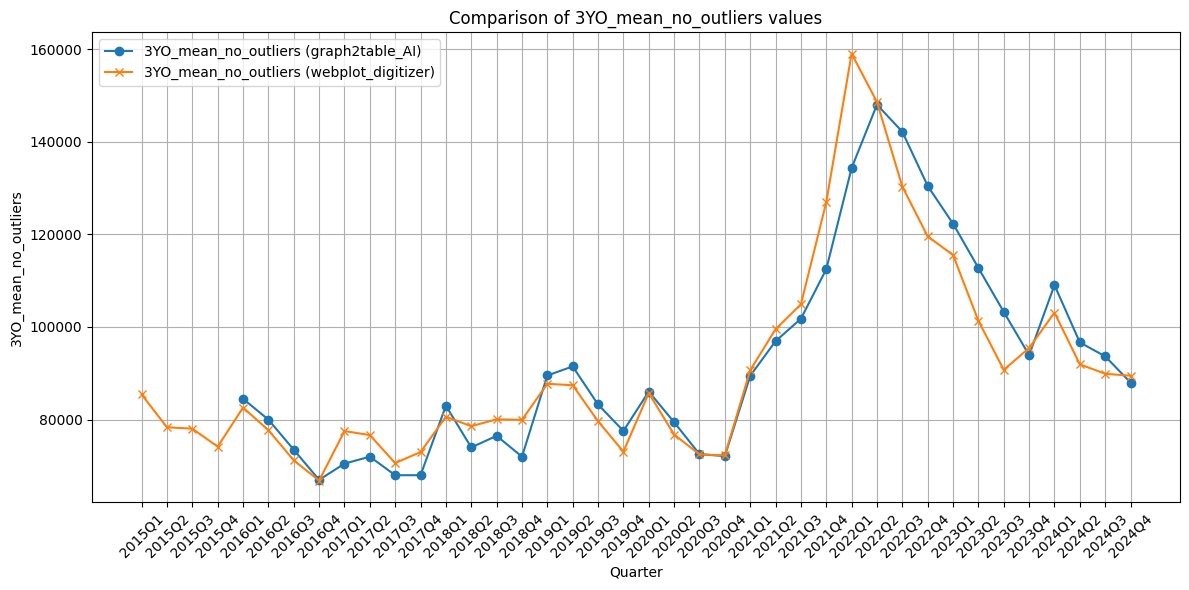

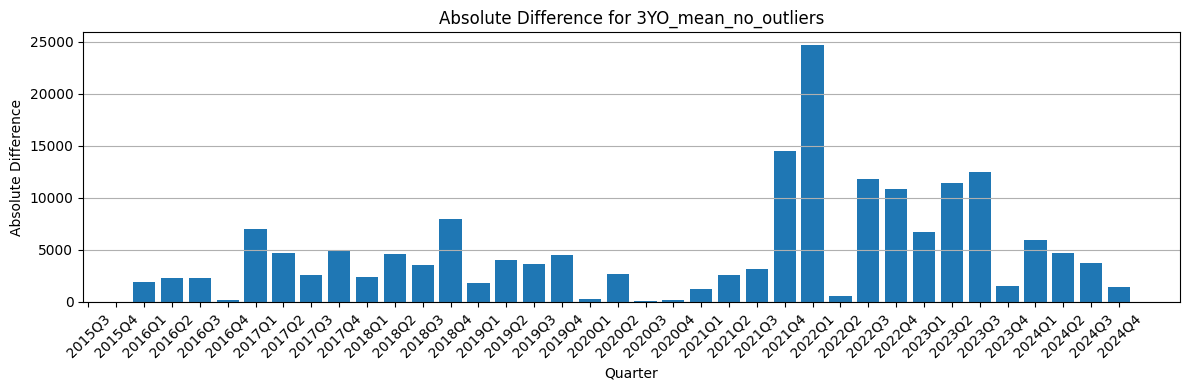

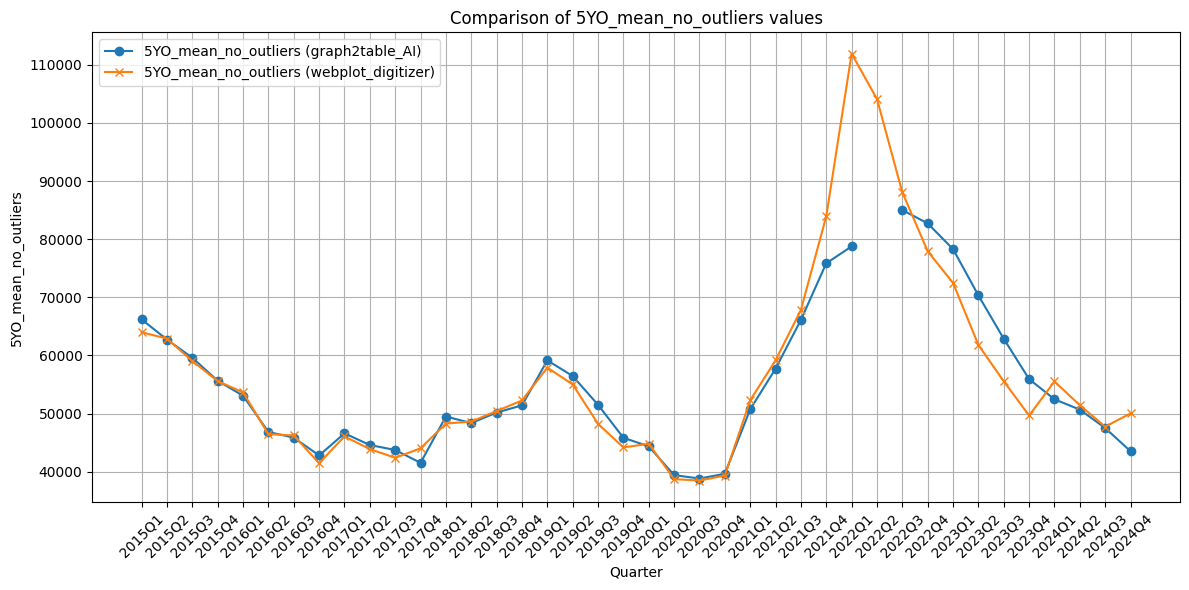

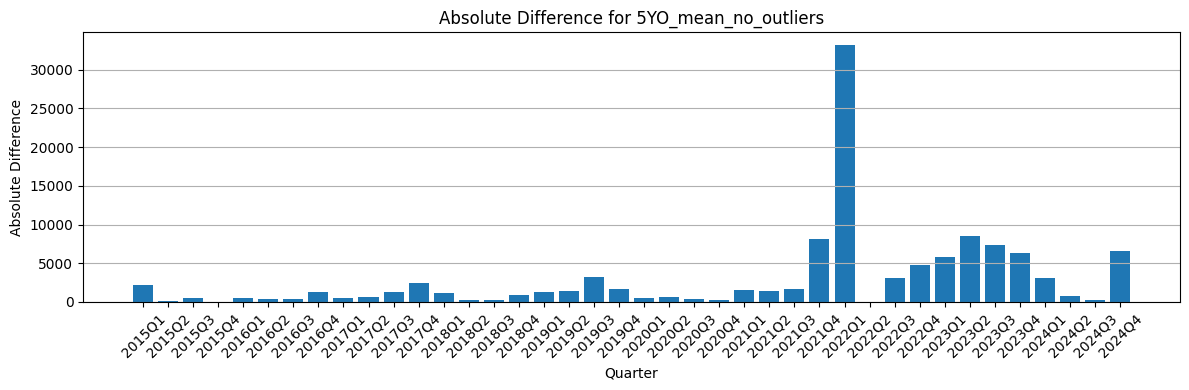

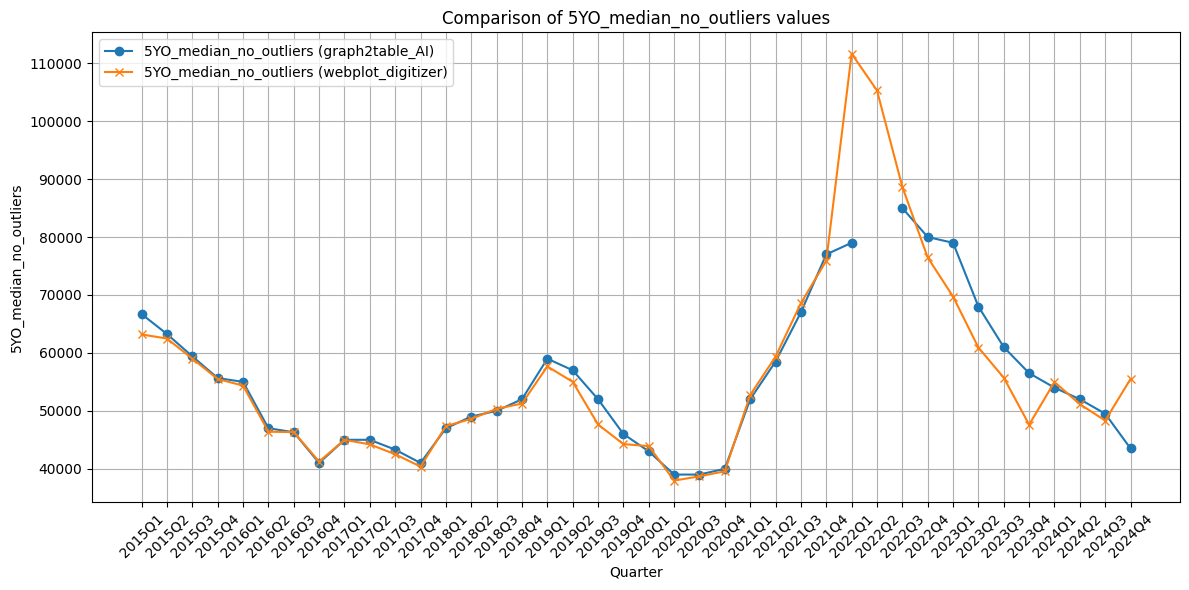

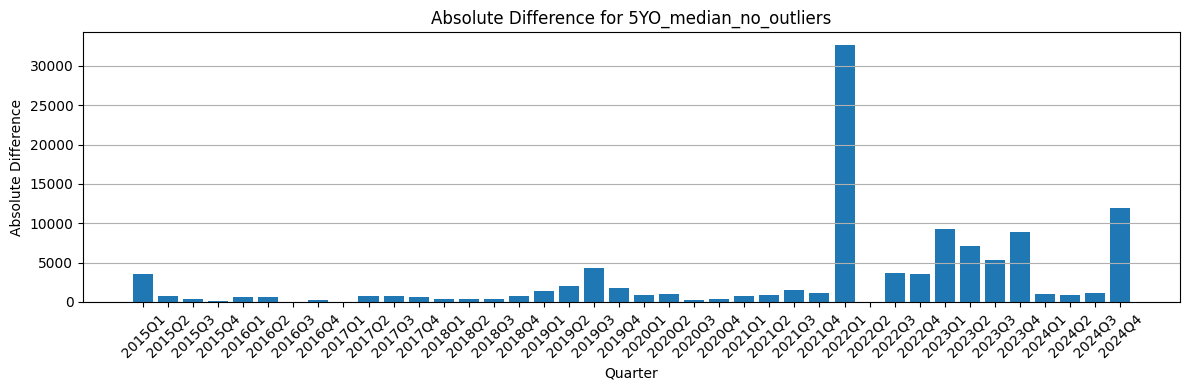

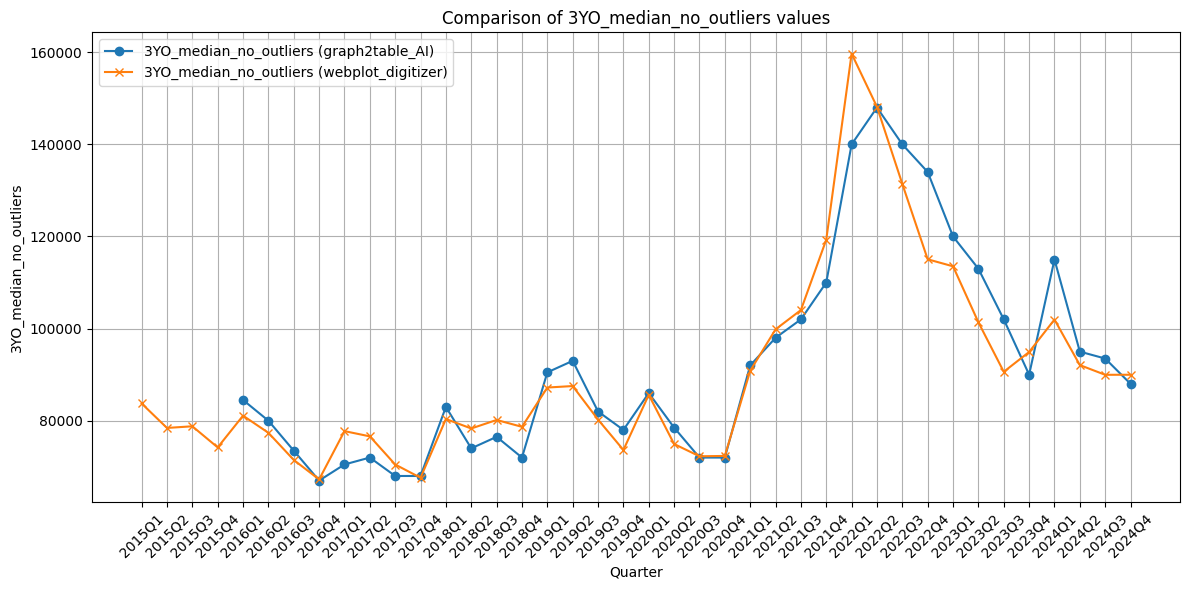

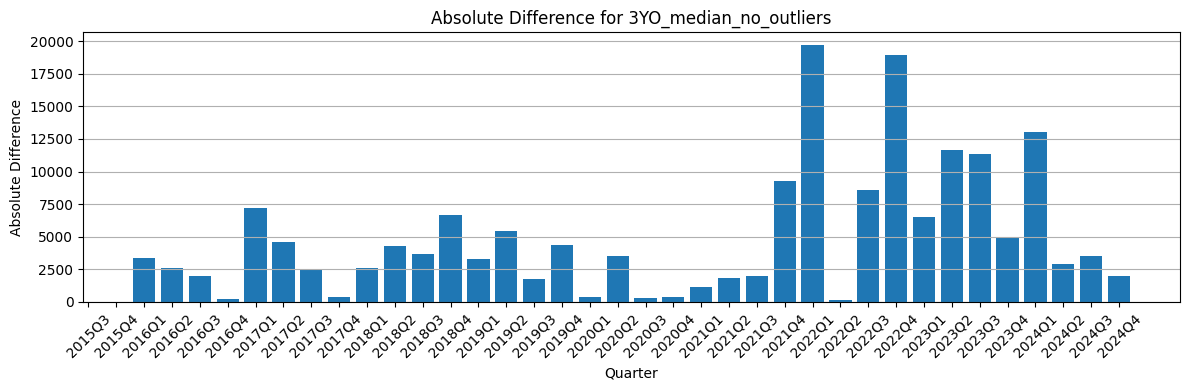

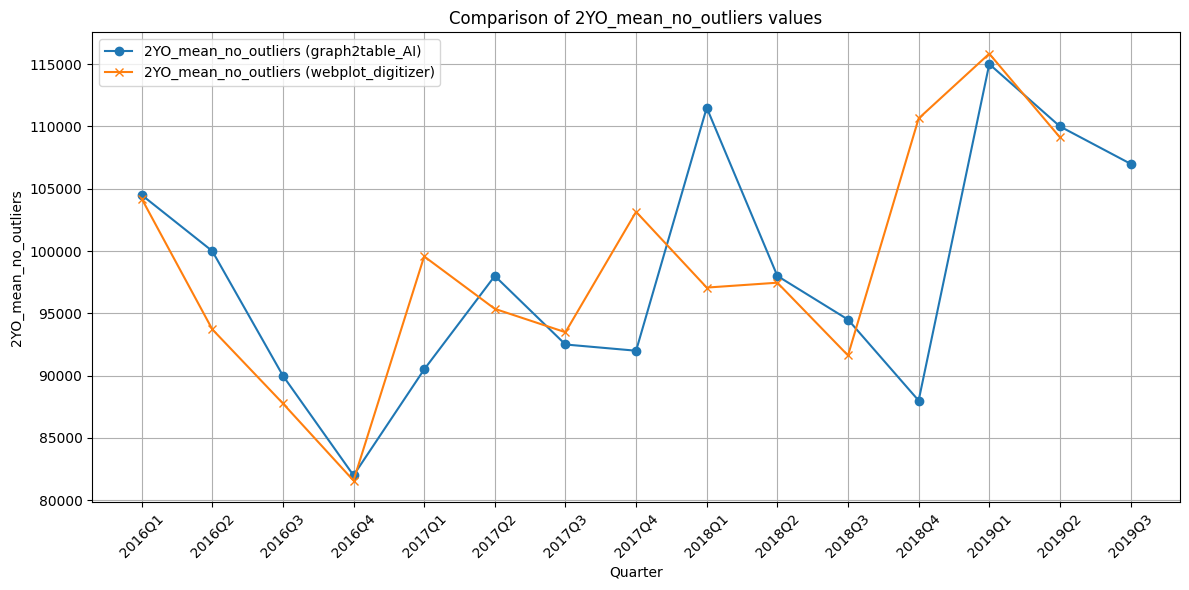

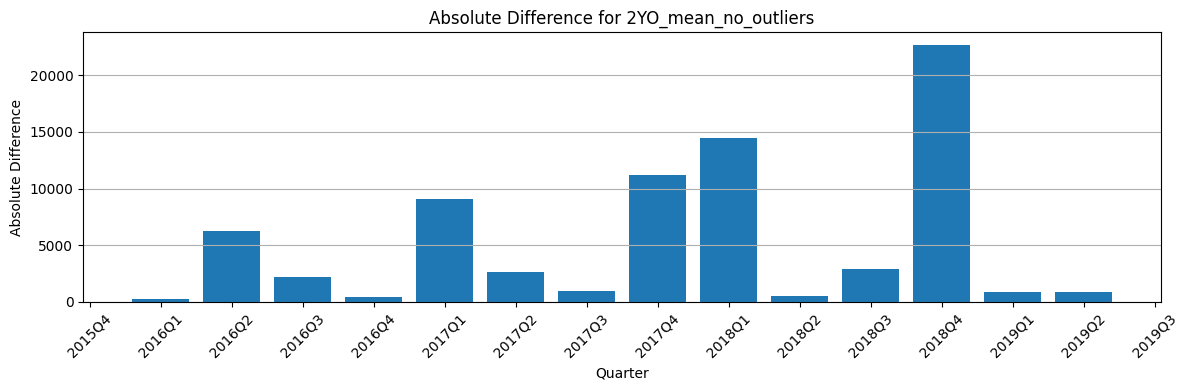

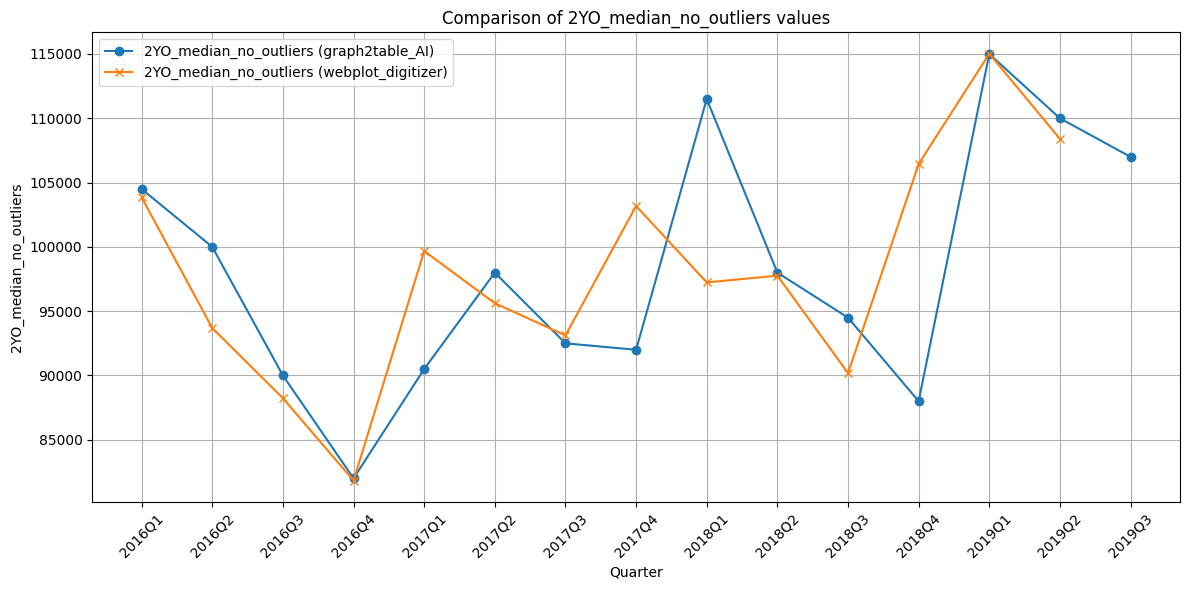

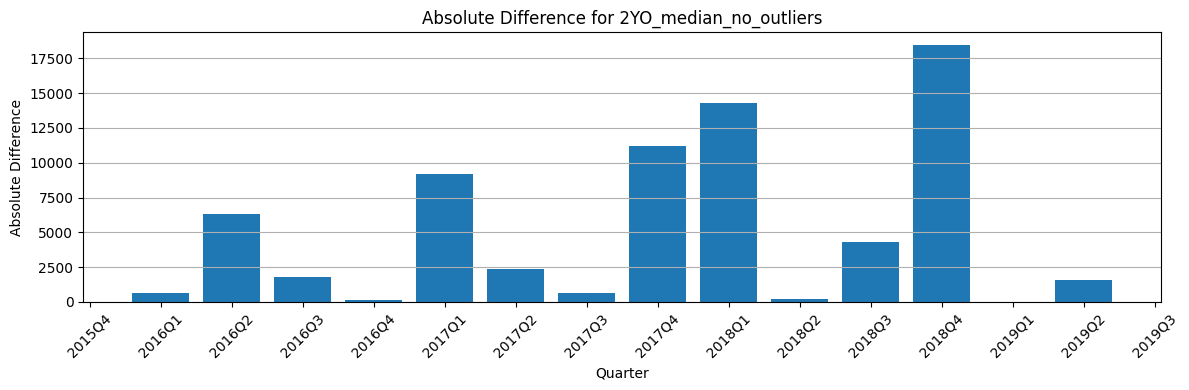

In [44]:
# Visualize differences for 'no_outliers' columns
if len(comparison_results) > 0:
    # Filter comparison_df to only include columns with 'no_outliers' in their names
    no_outliers_cols = [col for col in comparison_df['Column'].values if 'no_outliers' in col]
    
    if len(no_outliers_cols) > 0:
        print(f"Visualizing differences for {len(no_outliers_cols)} 'no_outliers' columns")
        
        # Iterate through filtered columns with discrepancies
        for col in no_outliers_cols:
            plt.figure(figsize=(12, 6))
            
            # Filter to common quarters and sort
            common_quarters = set(df1['Quarter']).intersection(set(df2['Quarter']))
            df1_filtered = df1[df1['Quarter'].isin(common_quarters)].sort_values('Quarter')
            df2_filtered = df2[df2['Quarter'].isin(common_quarters)].sort_values('Quarter')
            
            quarters = df1_filtered['Quarter']
            
            # Plot the values from both dataframes
            plt.plot(quarters, df1_filtered[col], label=f'{col} (graph2table_AI)', marker='o')
            plt.plot(quarters, df2_filtered[col], label=f'{col} (webplot_digitizer)', marker='x')
            
            plt.title(f'Comparison of {col} values')
            plt.xlabel('Quarter')
            plt.ylabel(col)
            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Plot the absolute differences
            abs_diff = np.abs(df1_filtered[col].values - df2_filtered[col].values)
            
            plt.figure(figsize=(12, 4))
            plt.bar(quarters, abs_diff)
            plt.title(f'Absolute Difference for {col}')
            plt.xlabel('Quarter')
            plt.ylabel('Absolute Difference')
            plt.xticks(rotation=45)
            plt.grid(True, axis='y')
            plt.tight_layout()
            plt.show()
    else:
        print("No 'no_outliers' columns found in the comparison results.")
else:
    print("No comparison results available for visualization.")

Visualizing differences for 32 common numeric columns


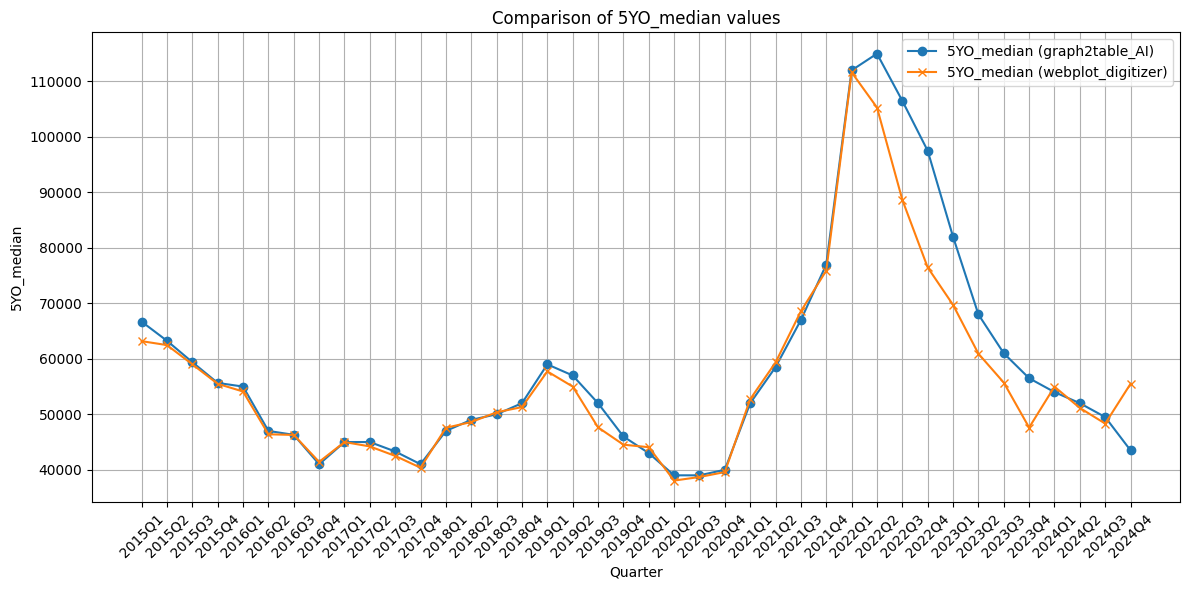

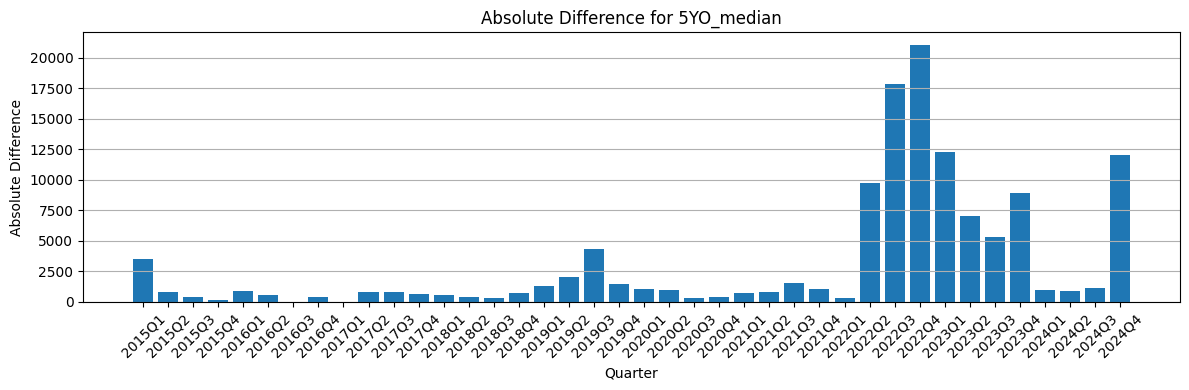

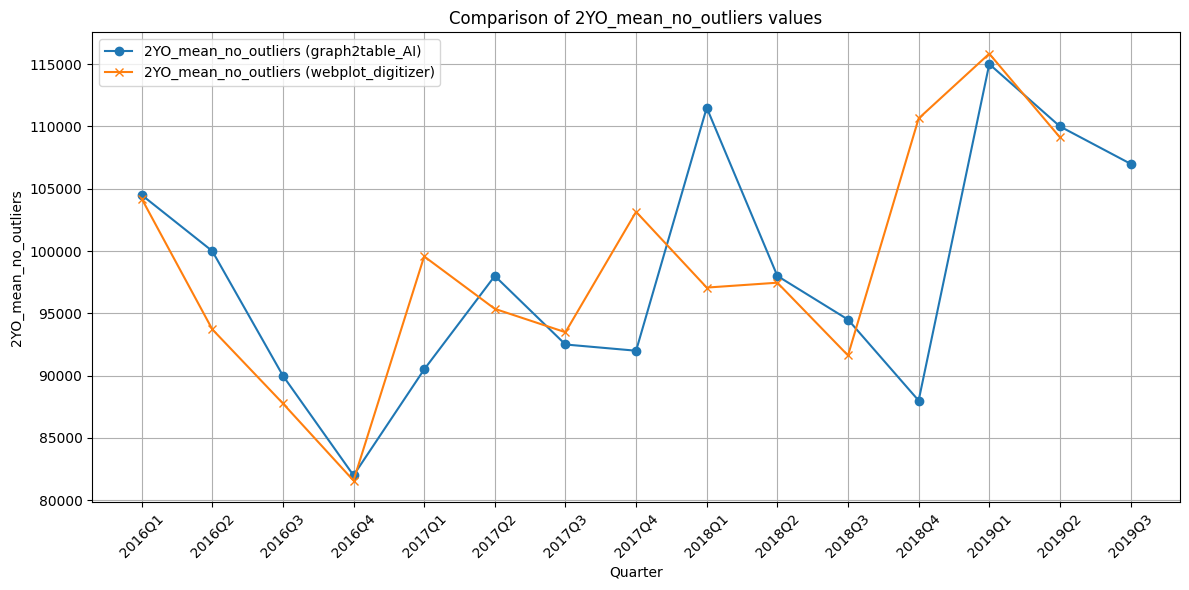

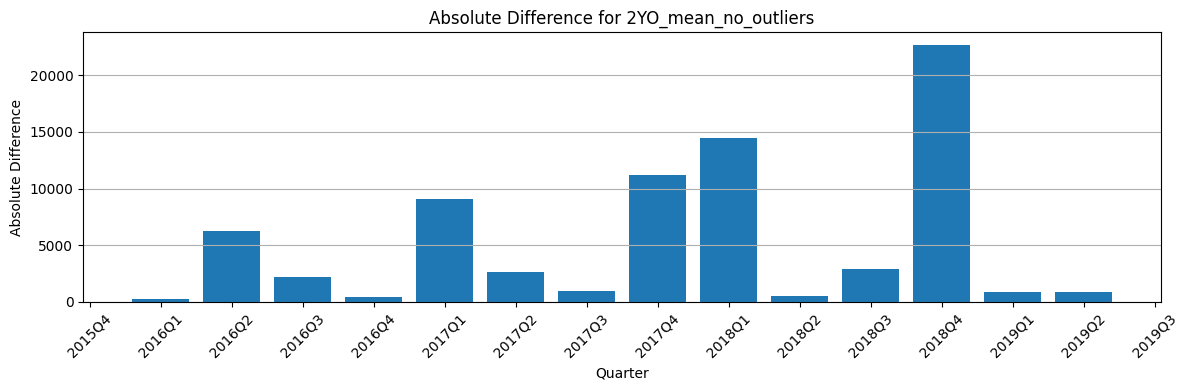

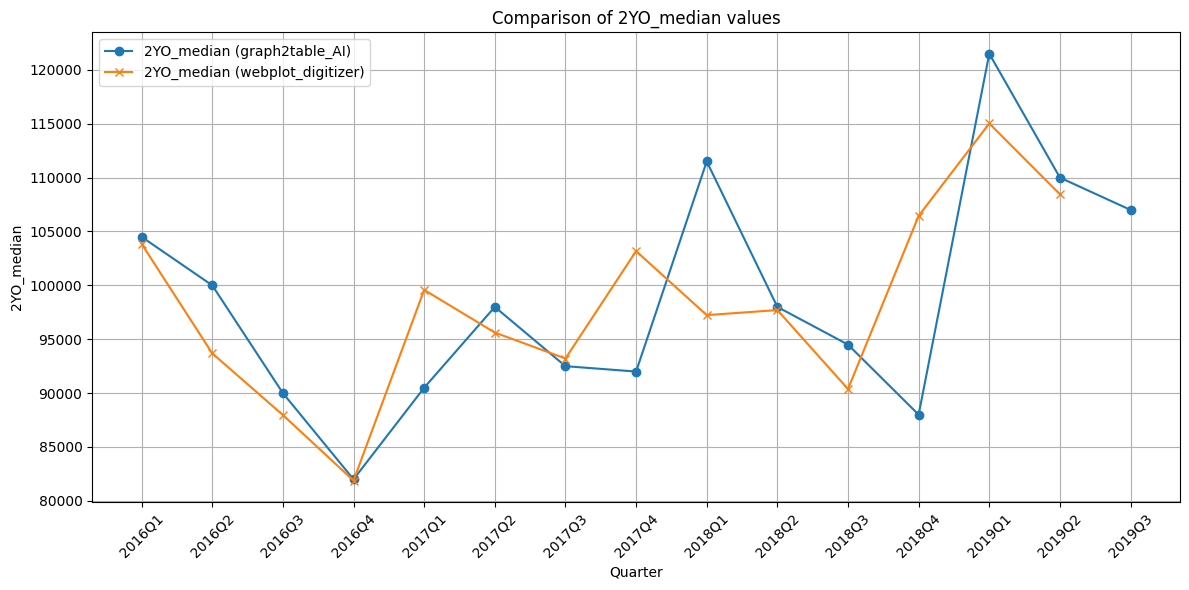

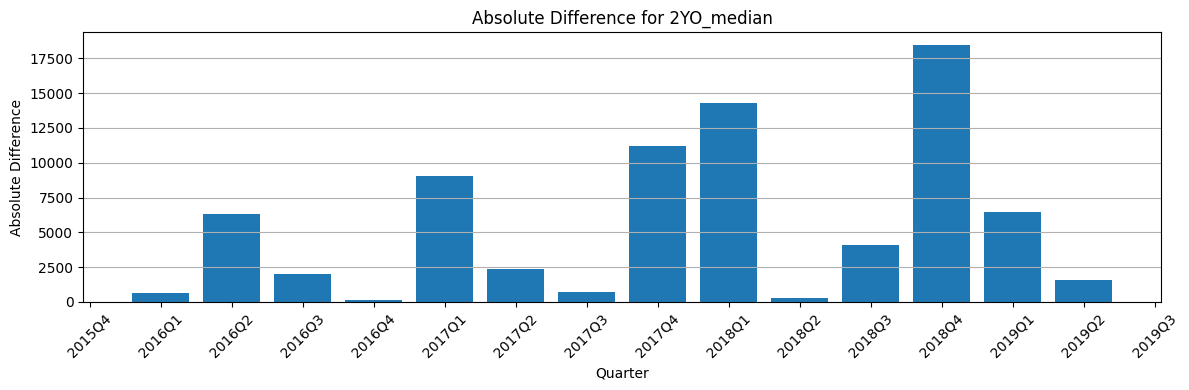

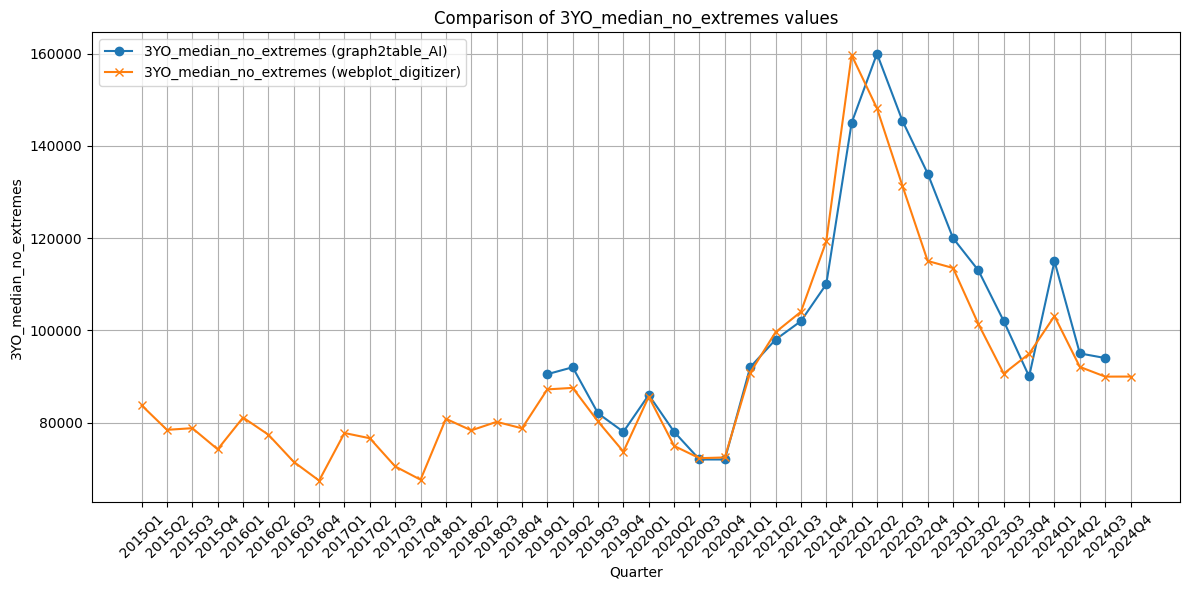

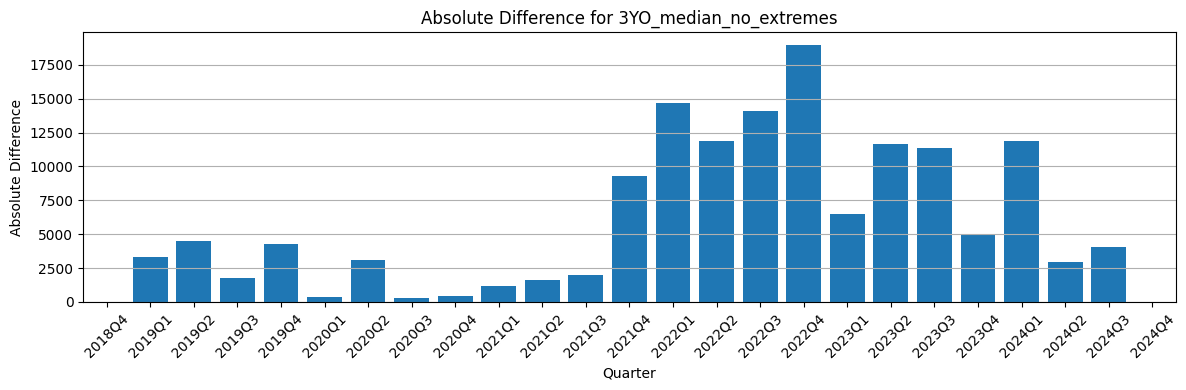

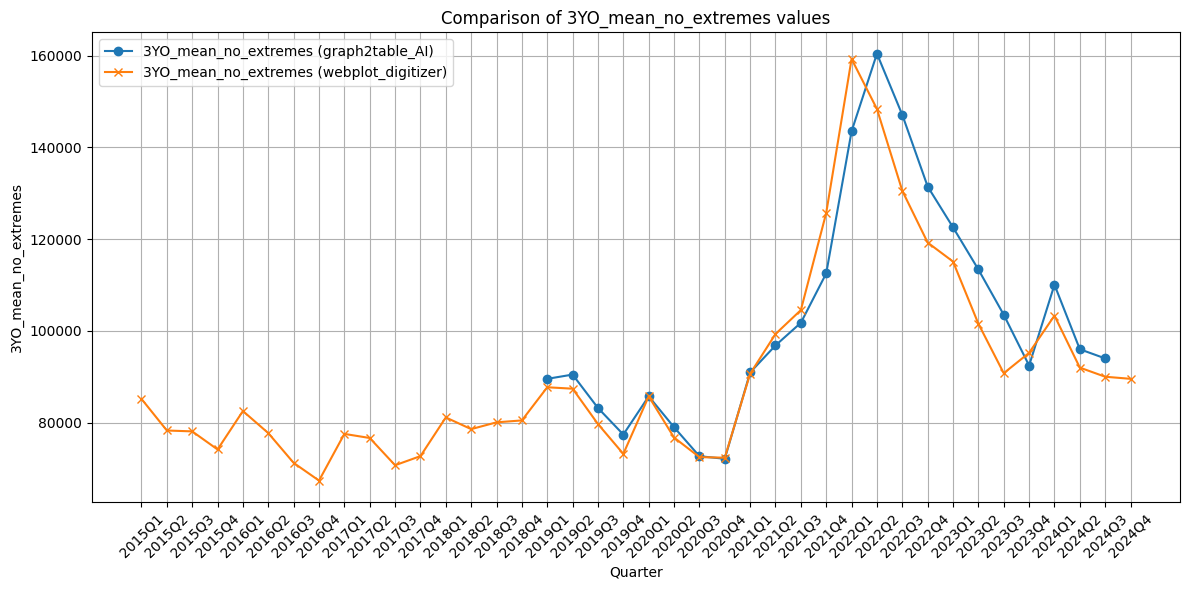

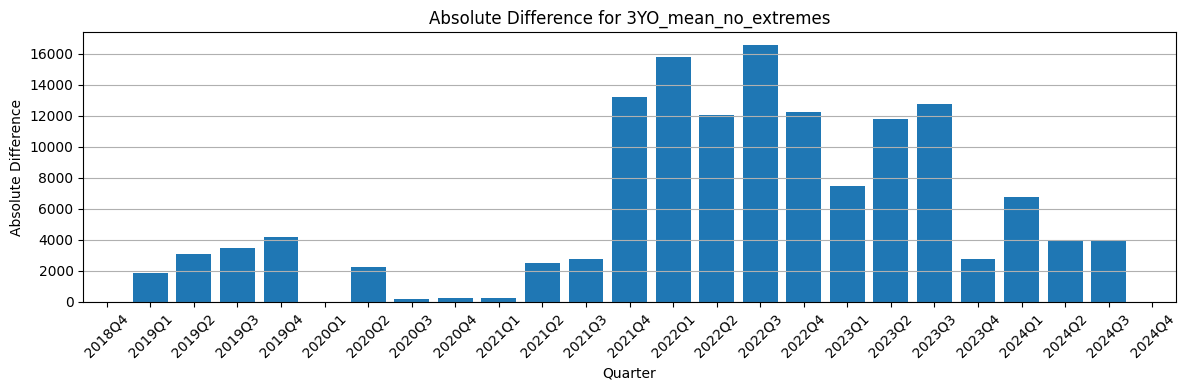

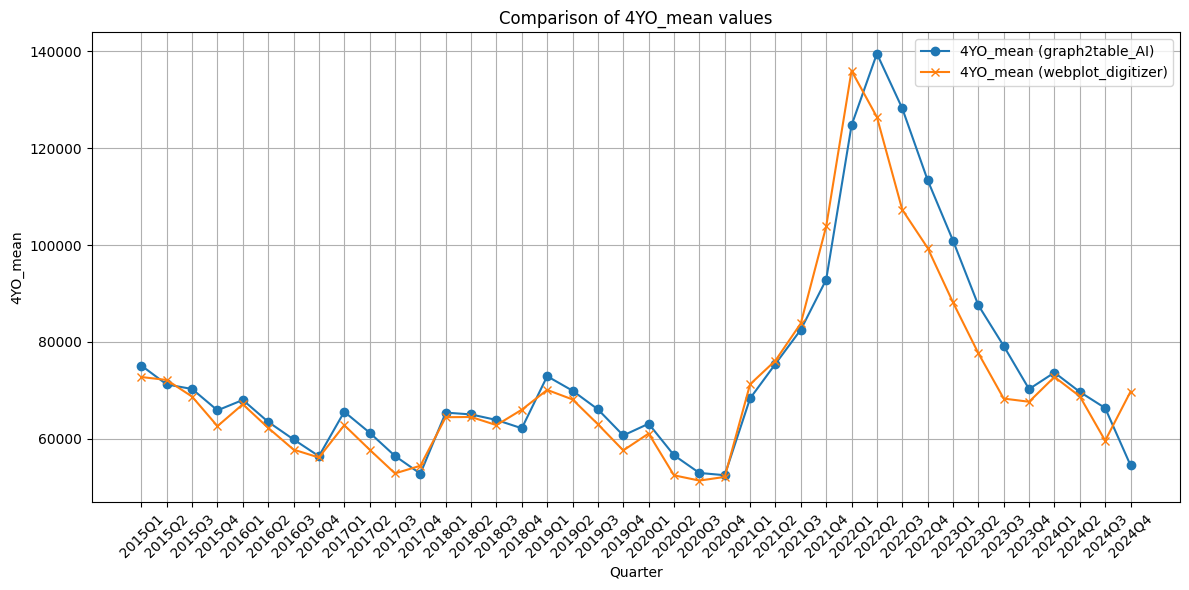

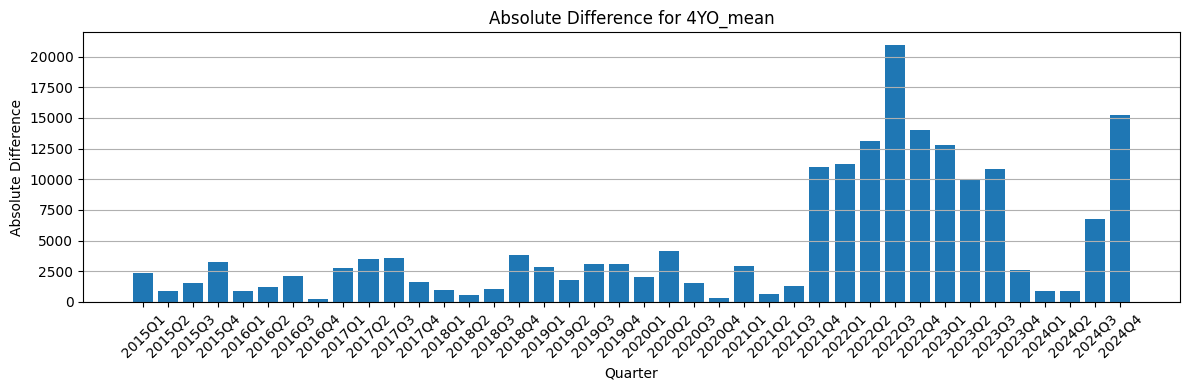

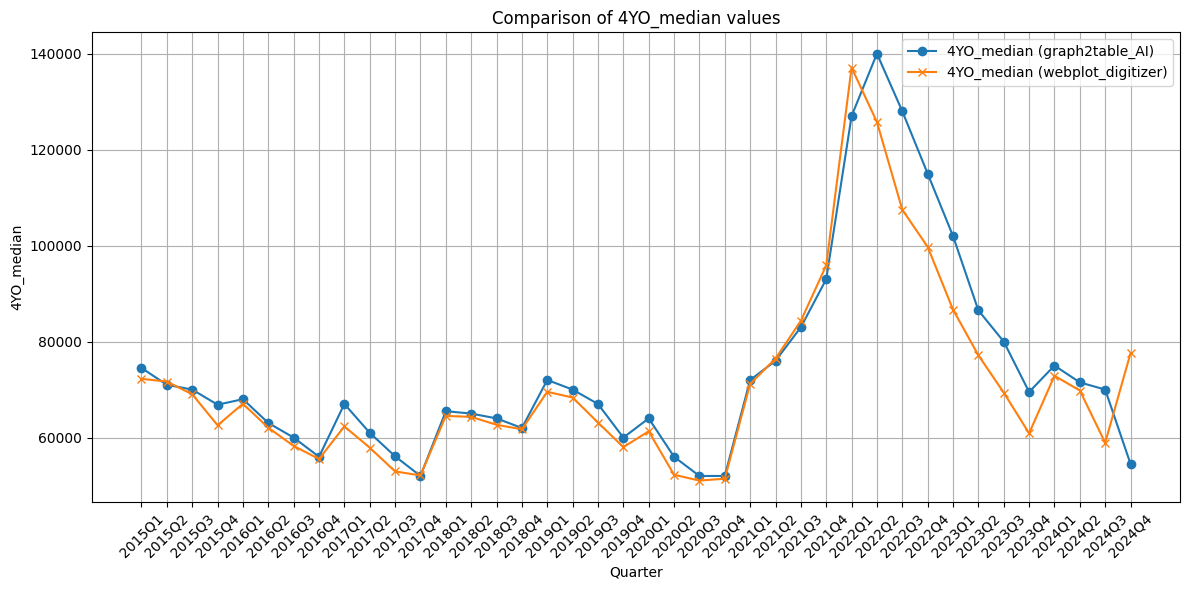

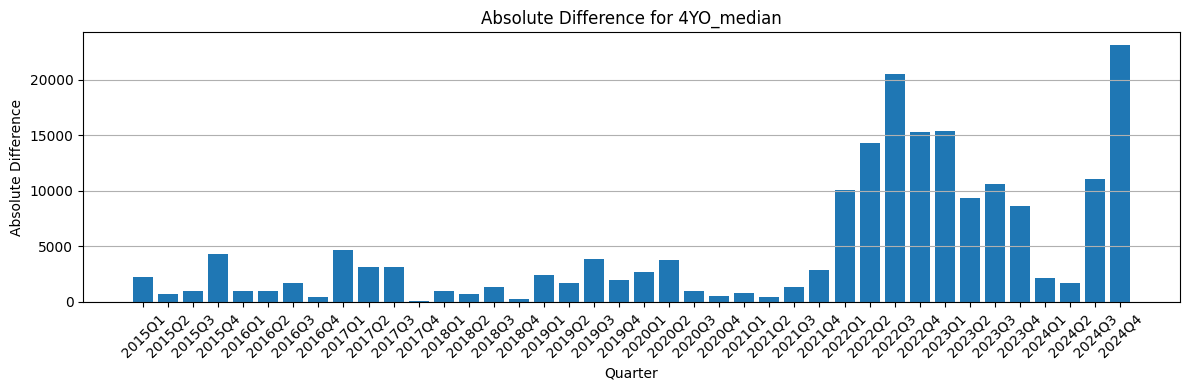

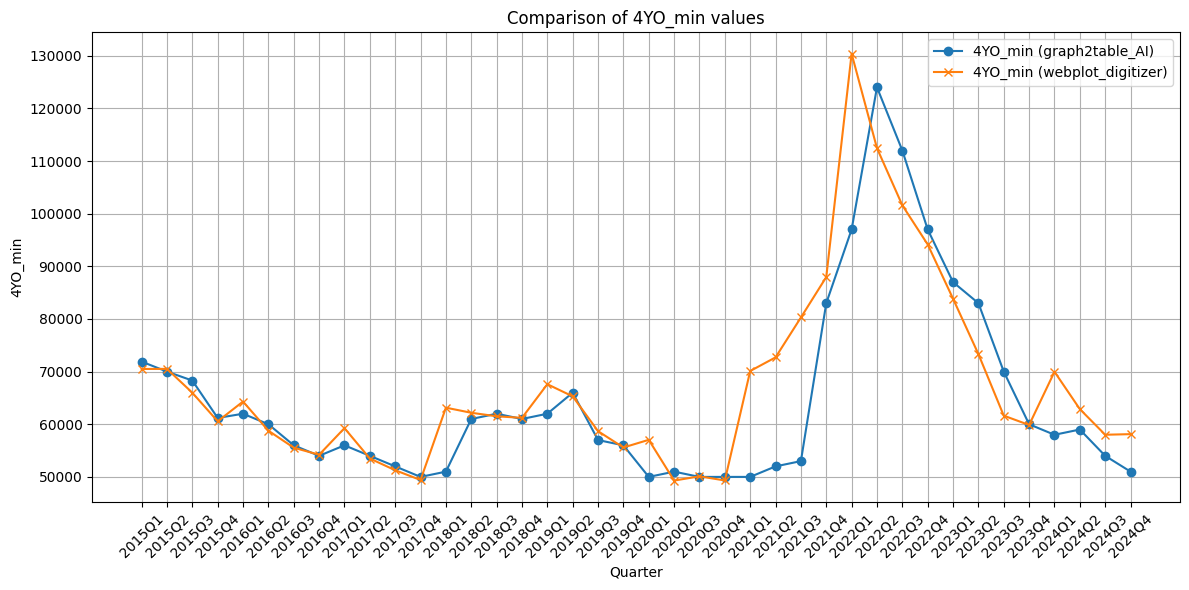

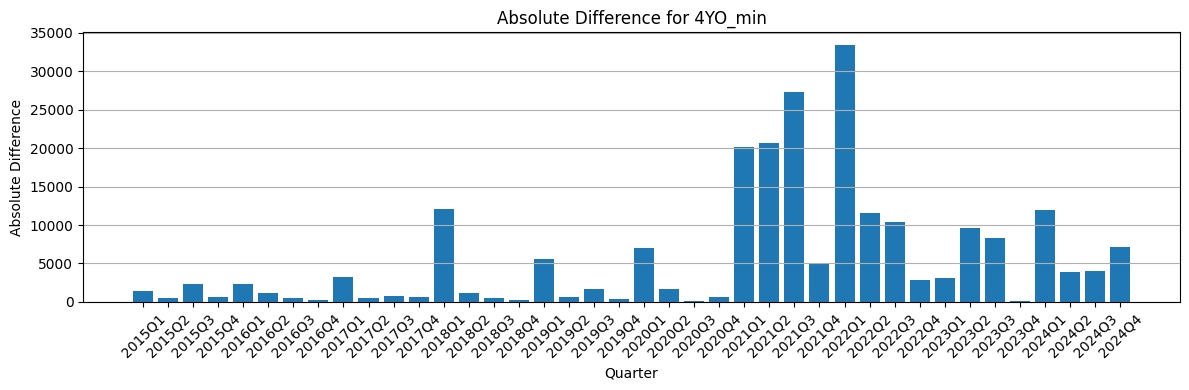

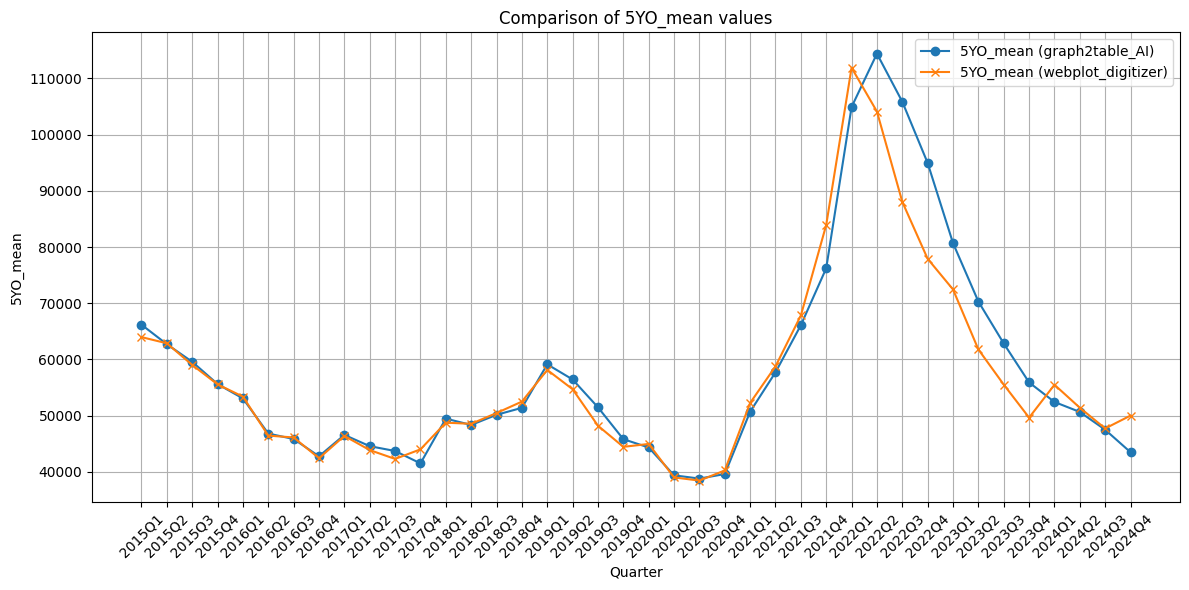

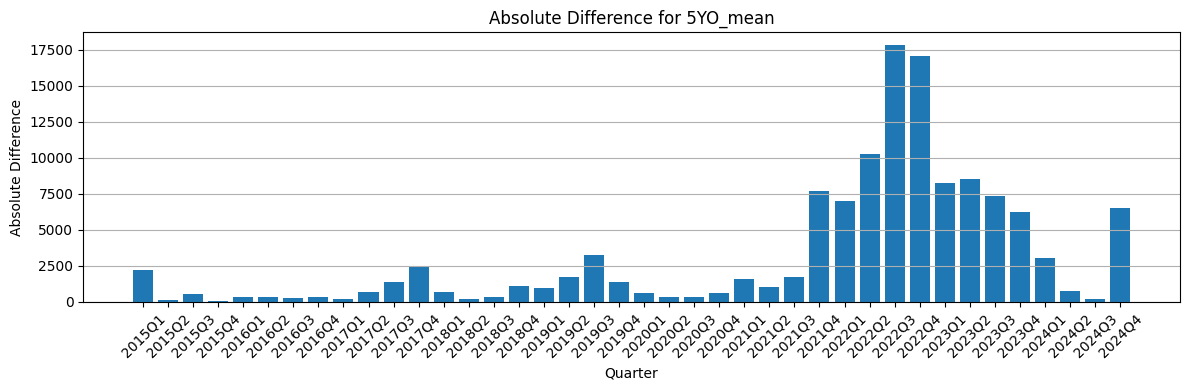

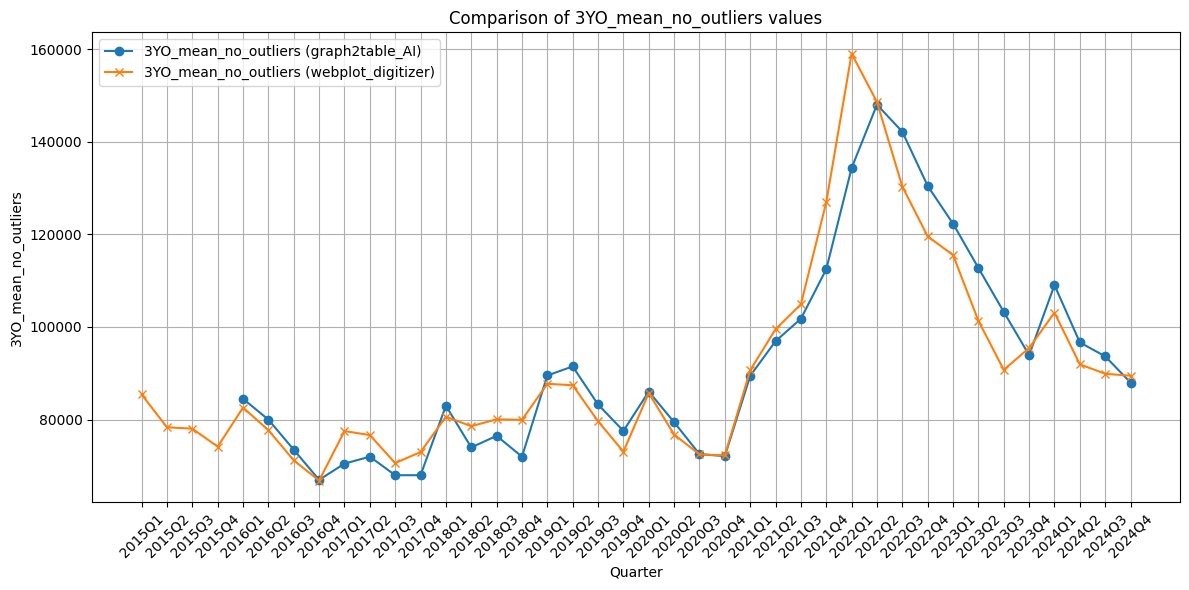

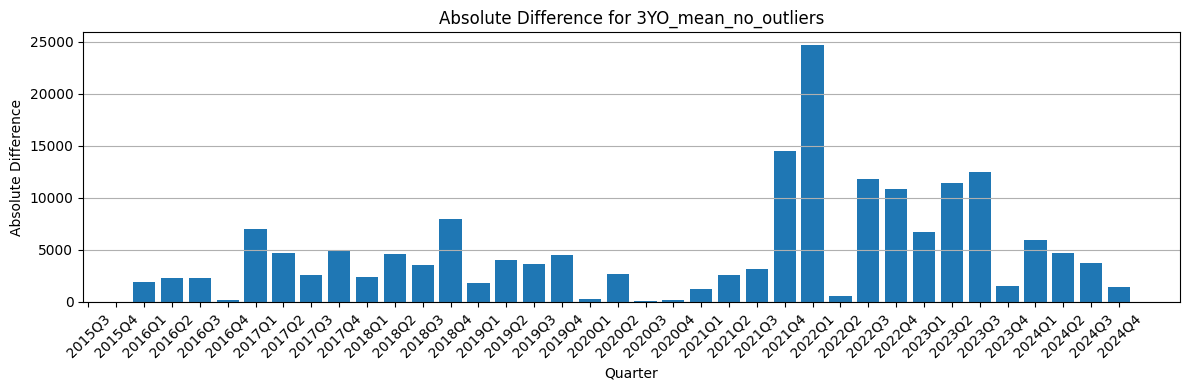

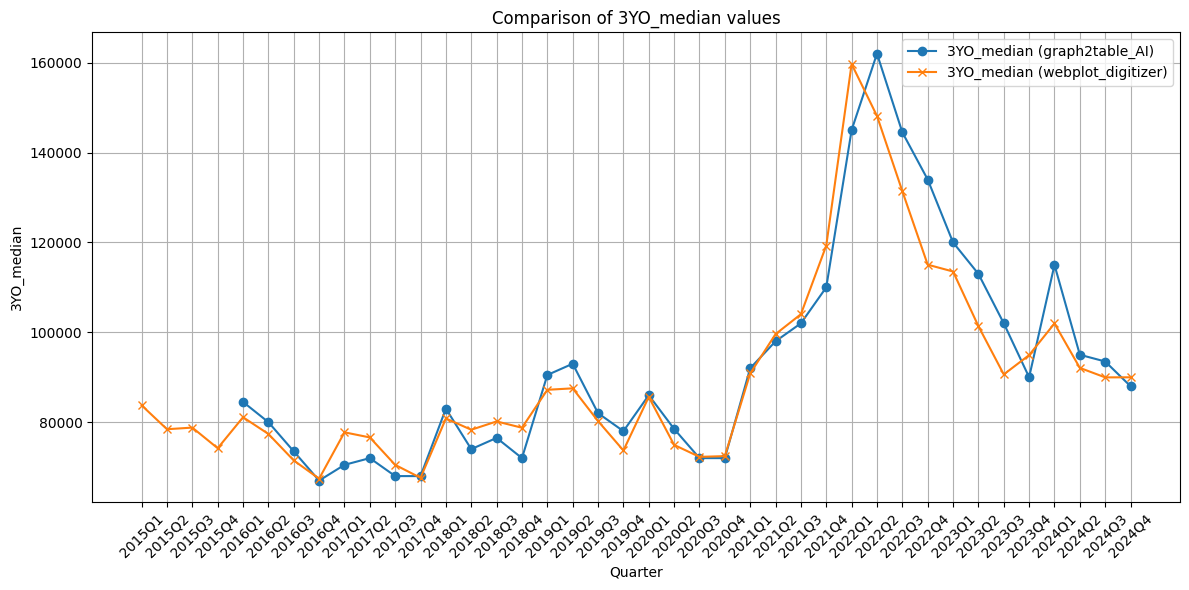

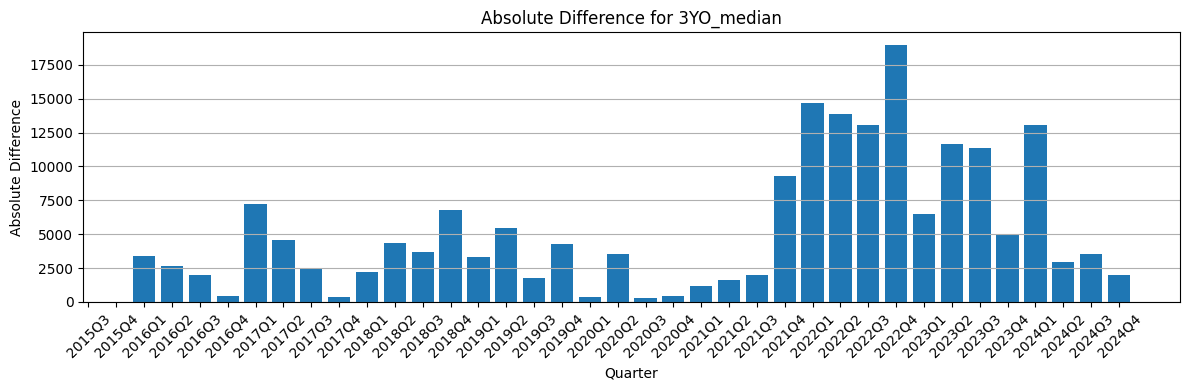

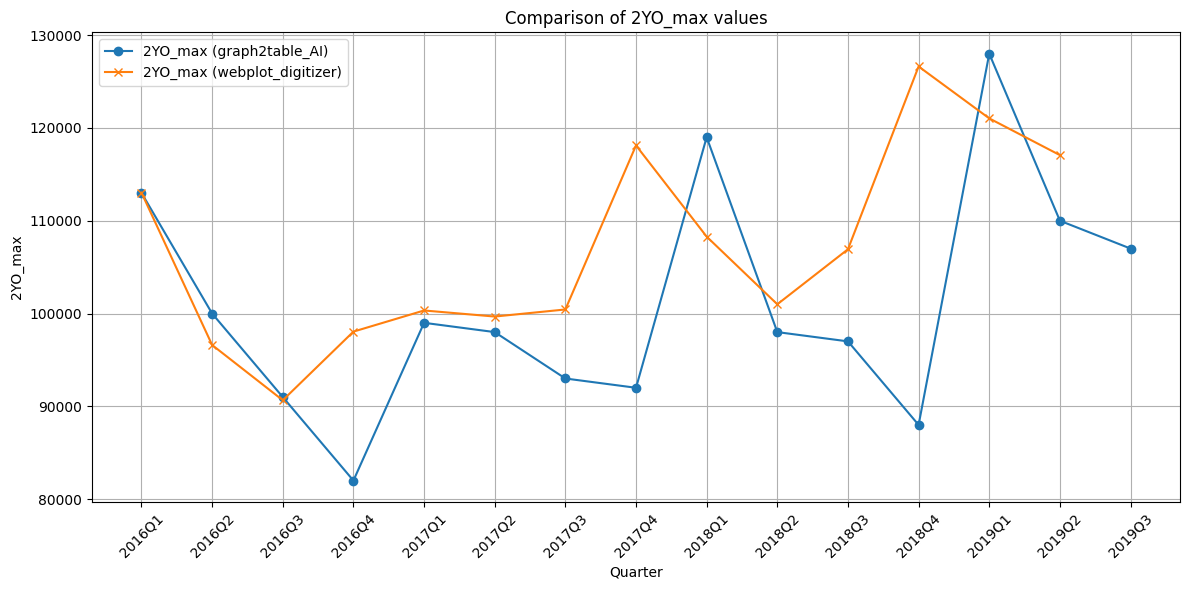

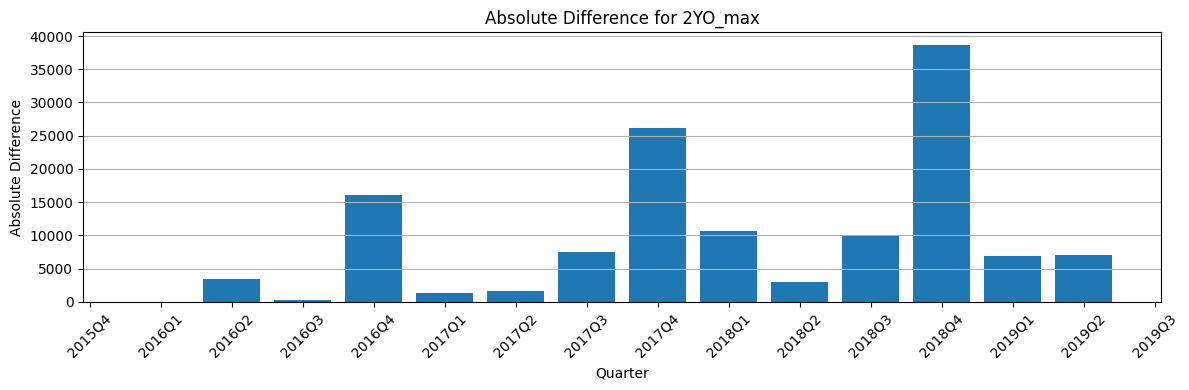

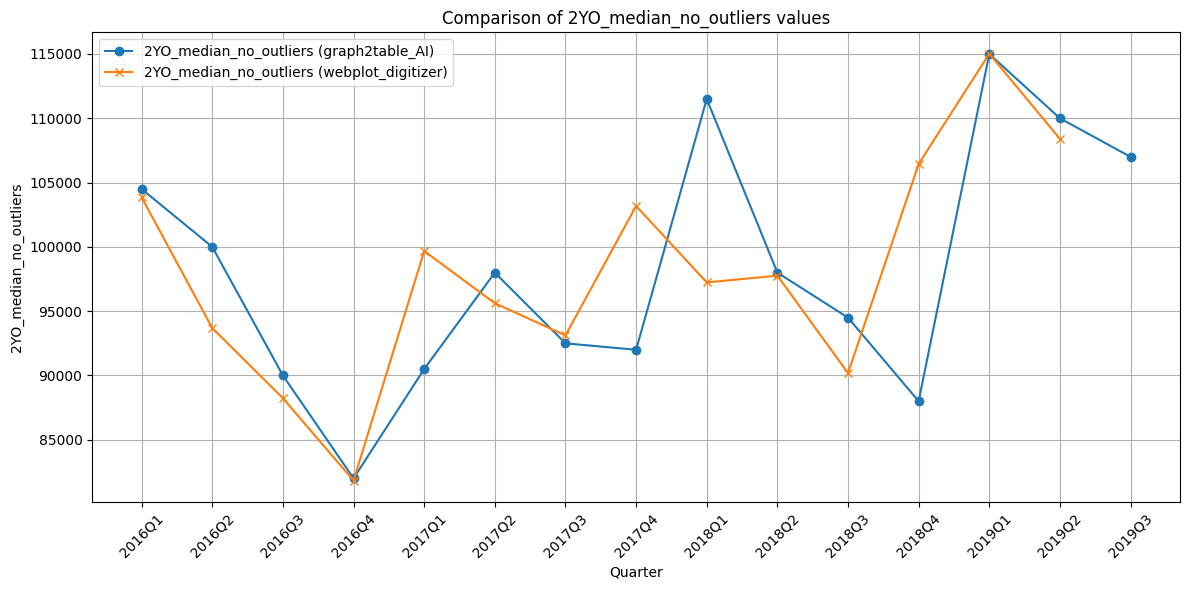

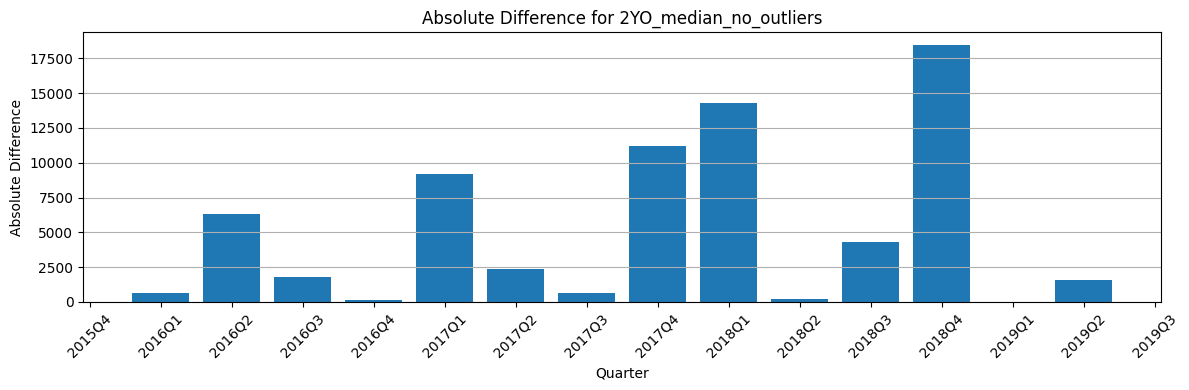

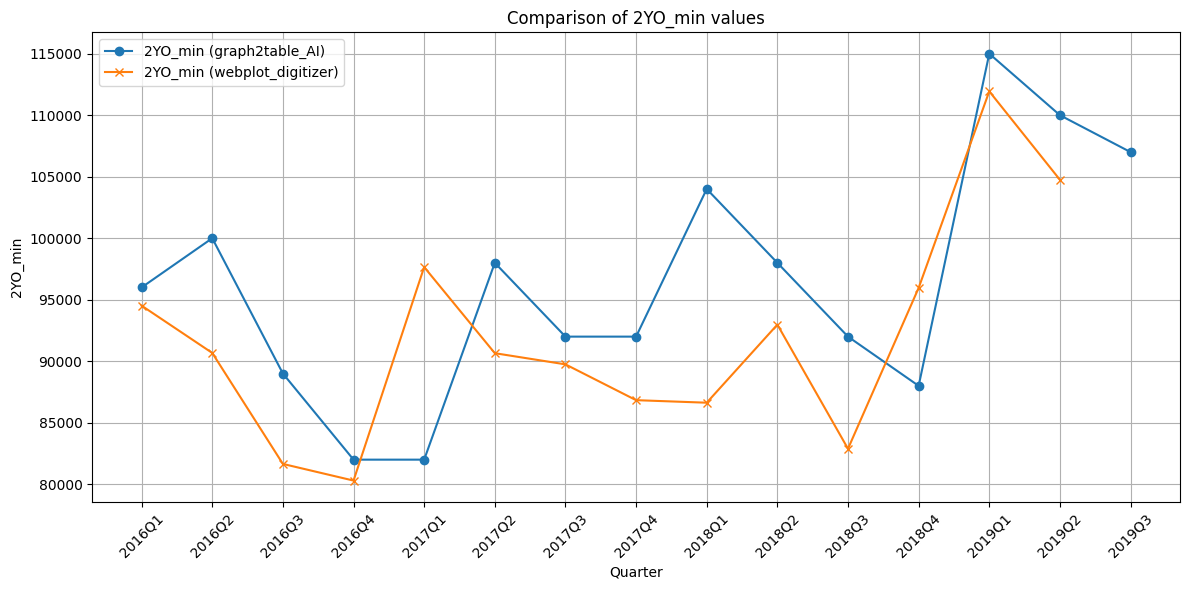

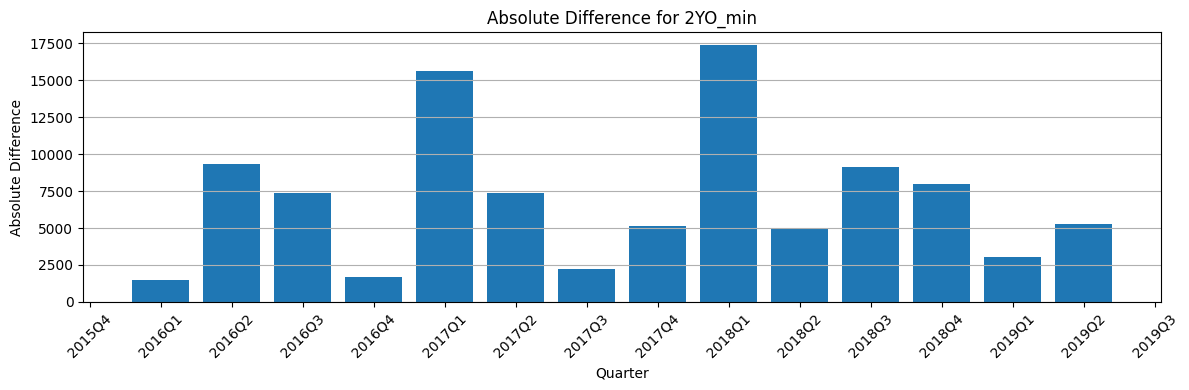

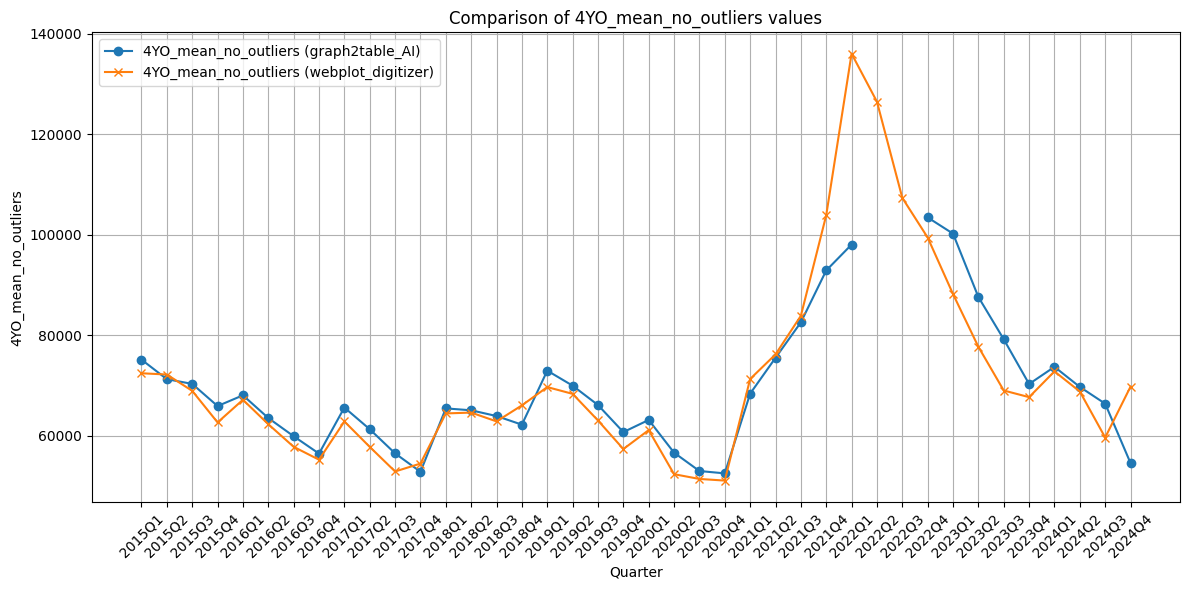

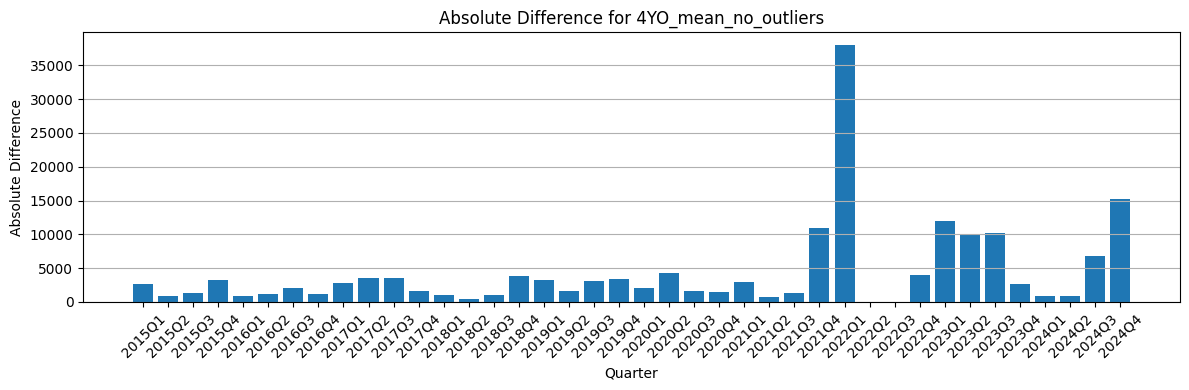

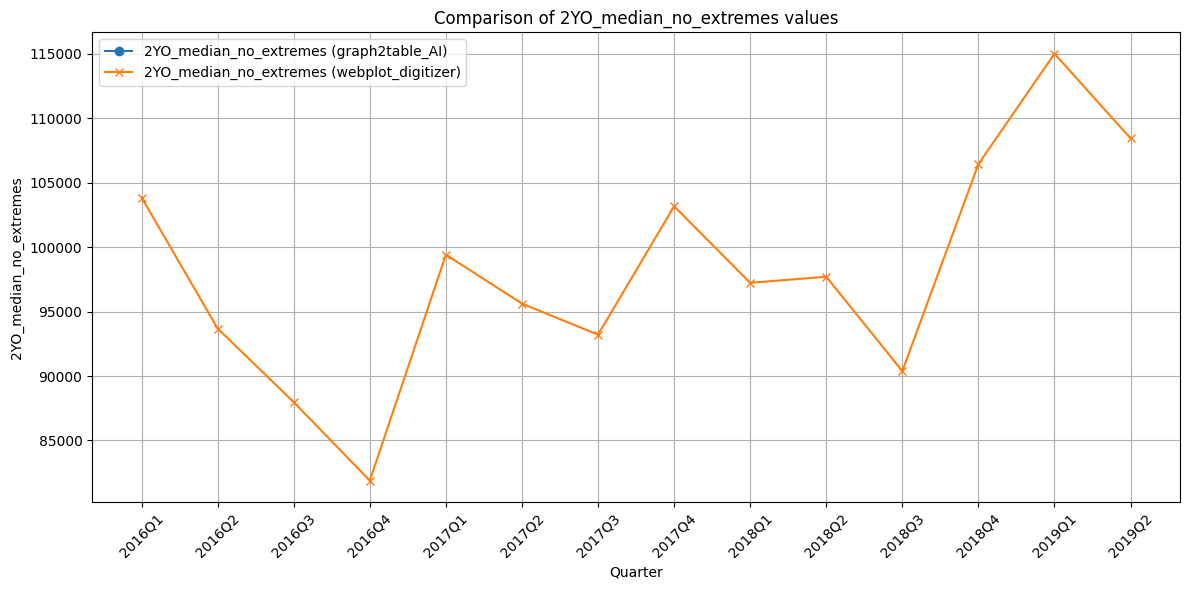

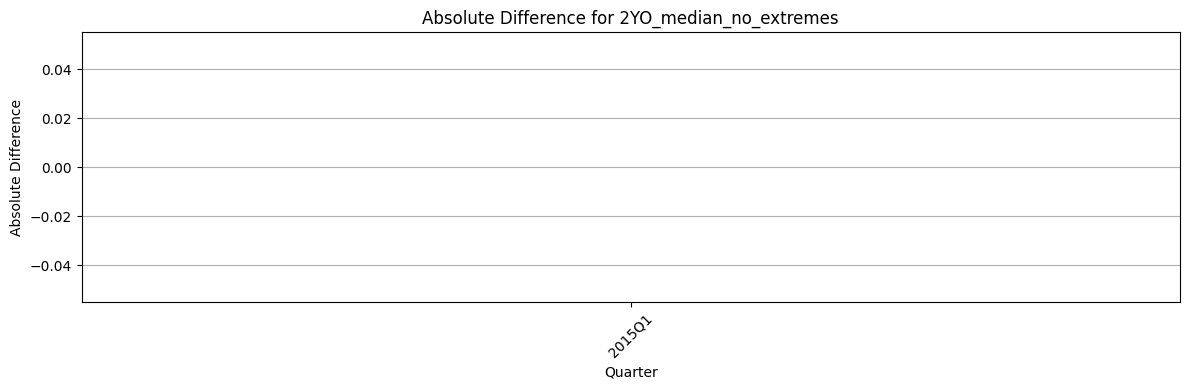

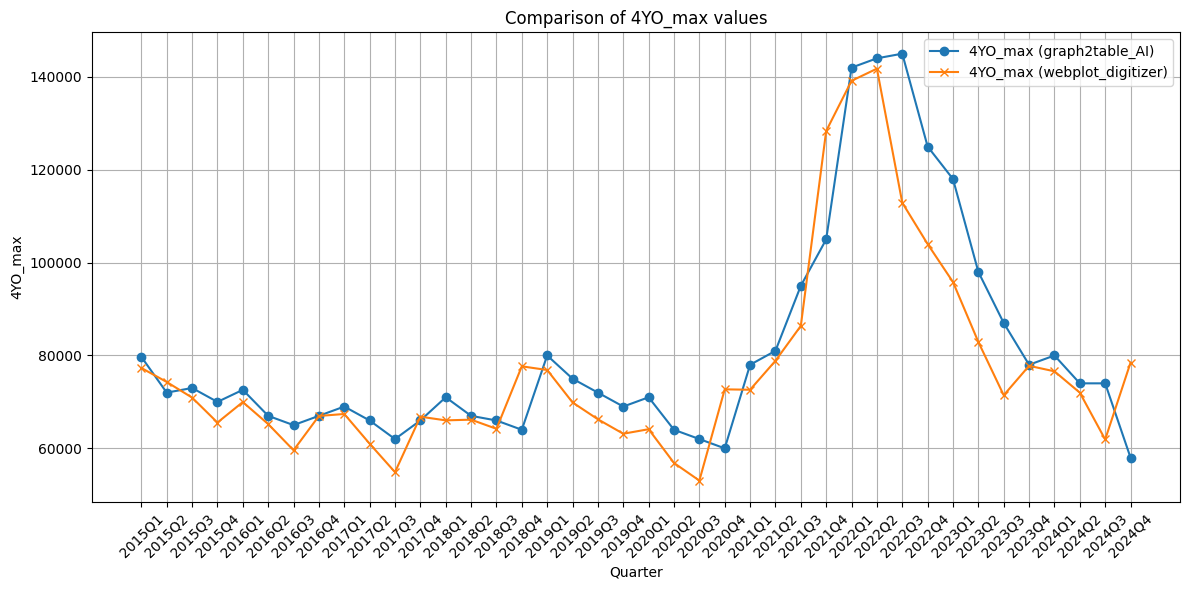

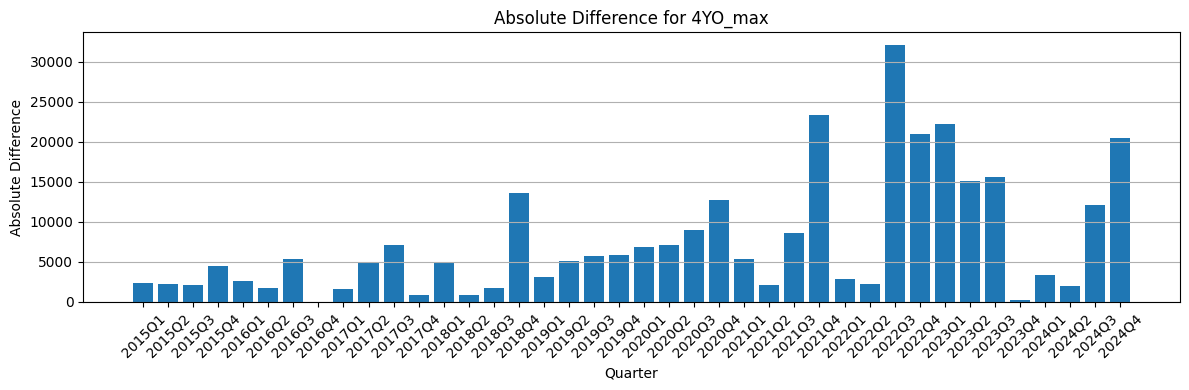

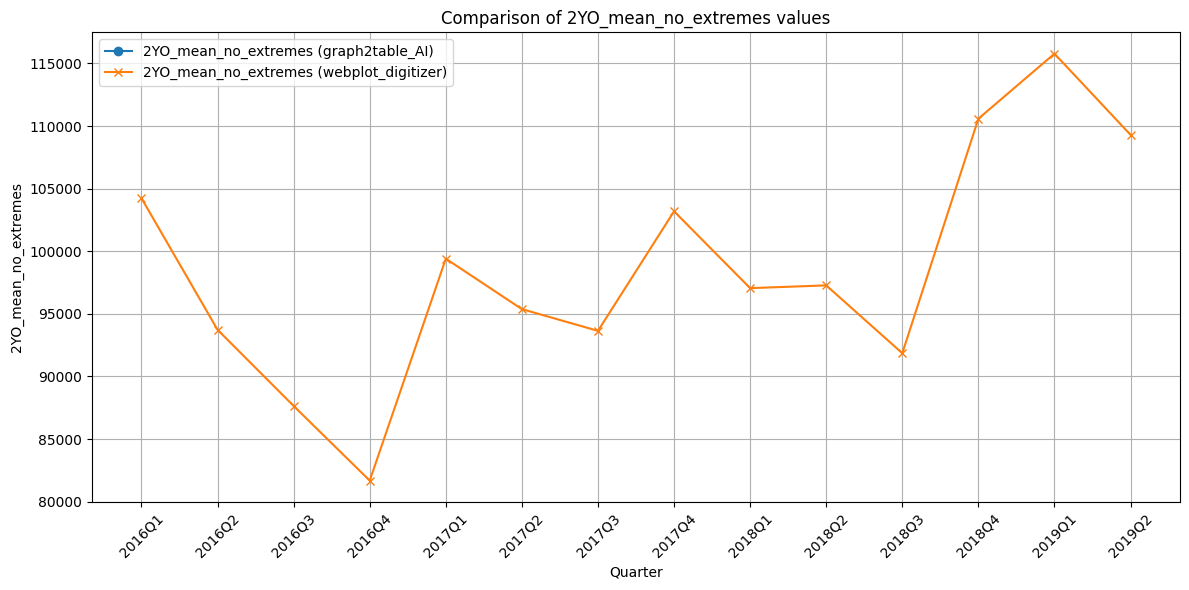

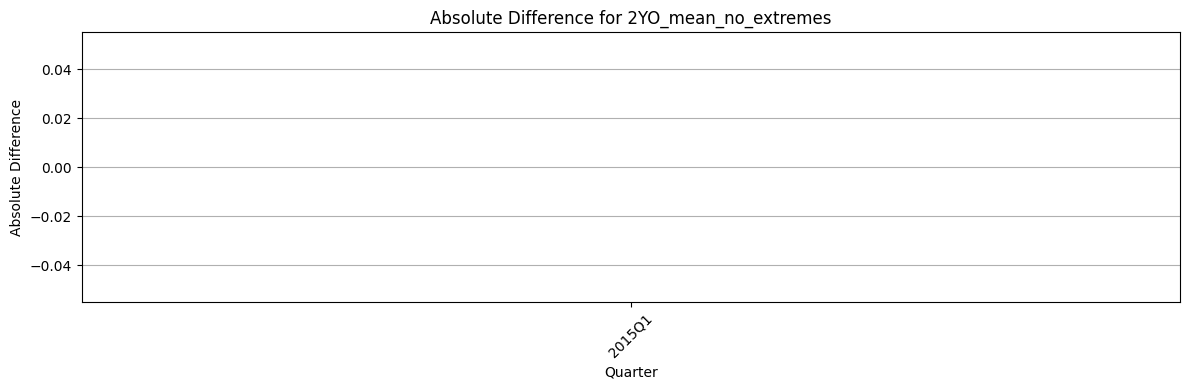

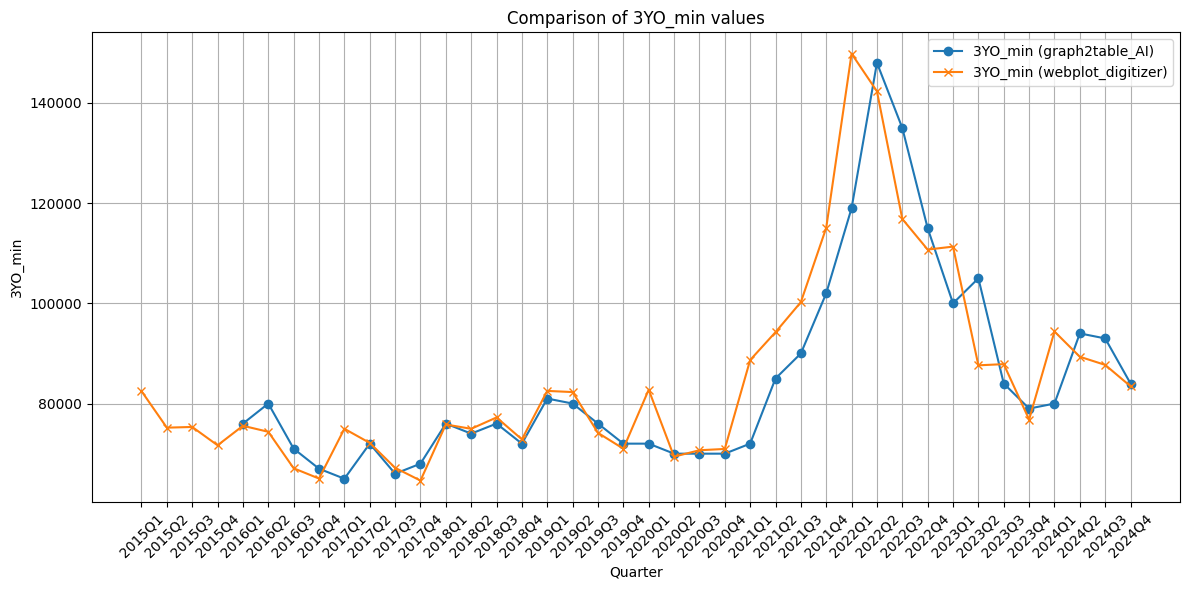

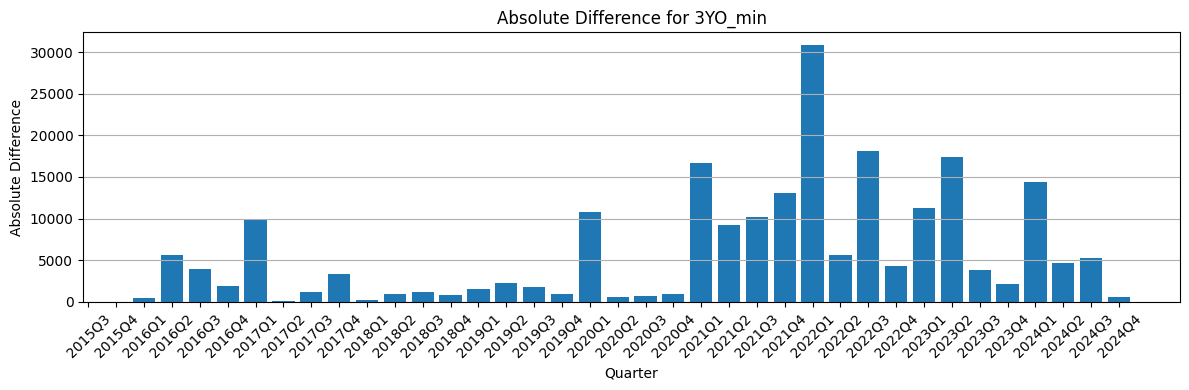

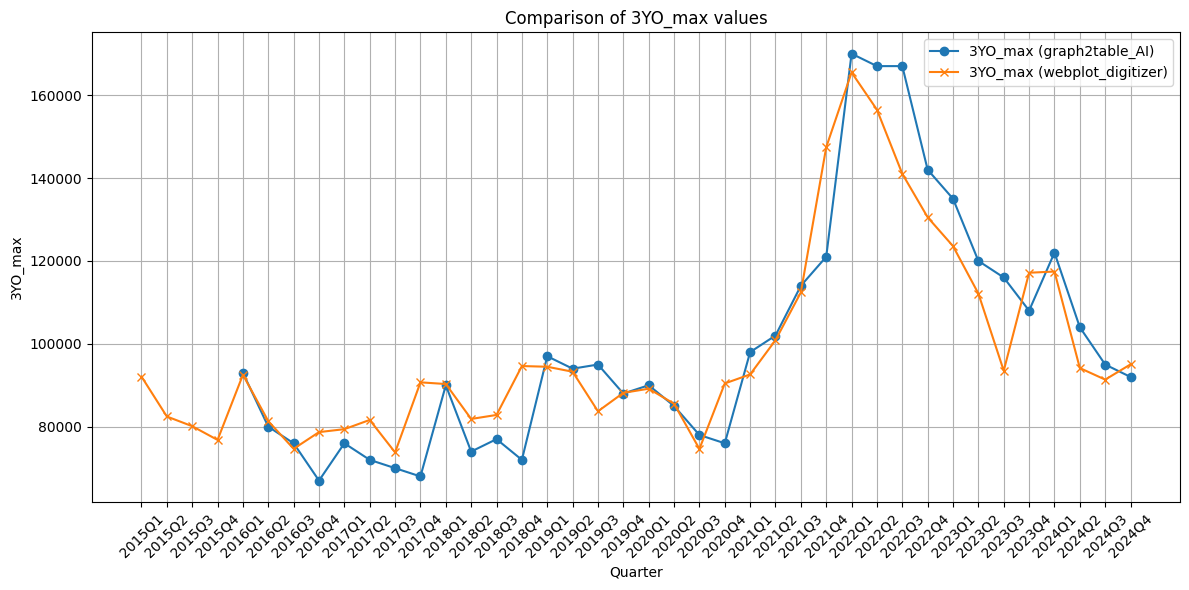

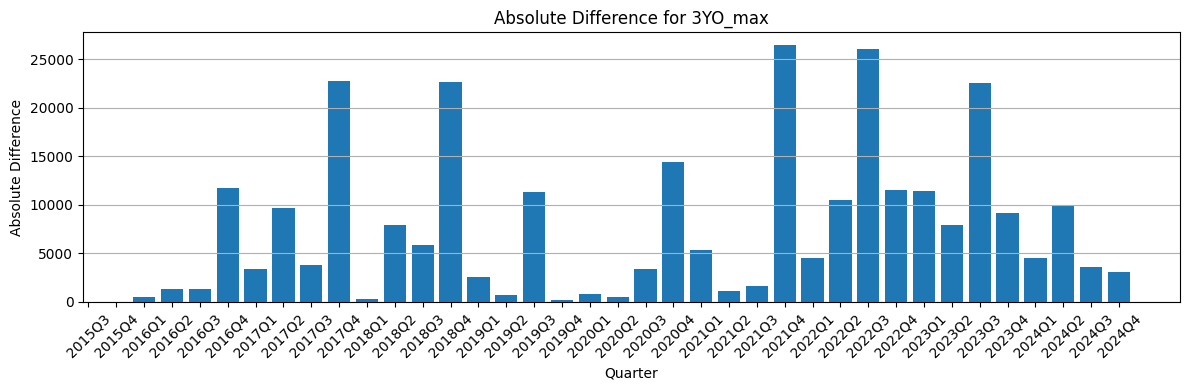

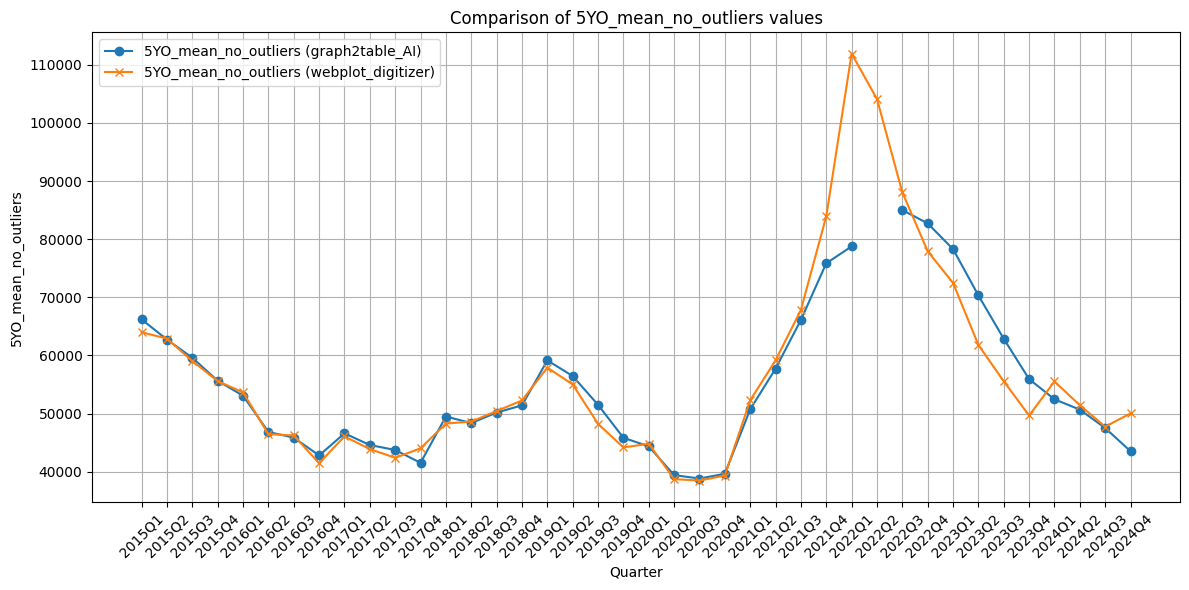

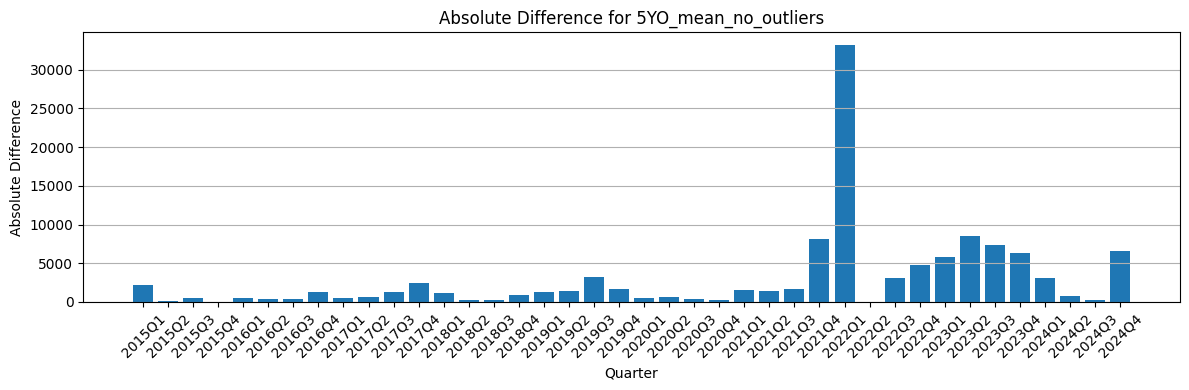

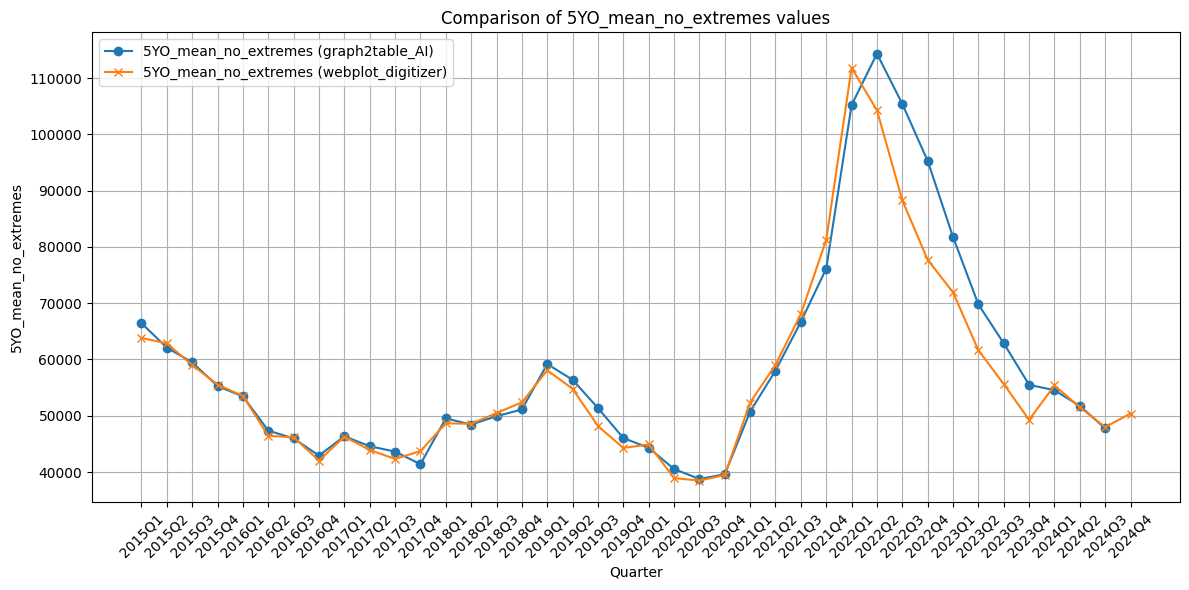

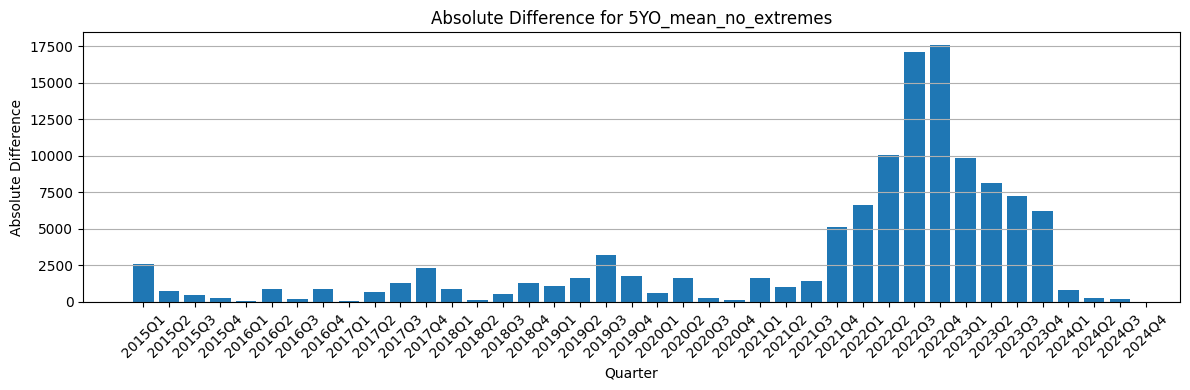

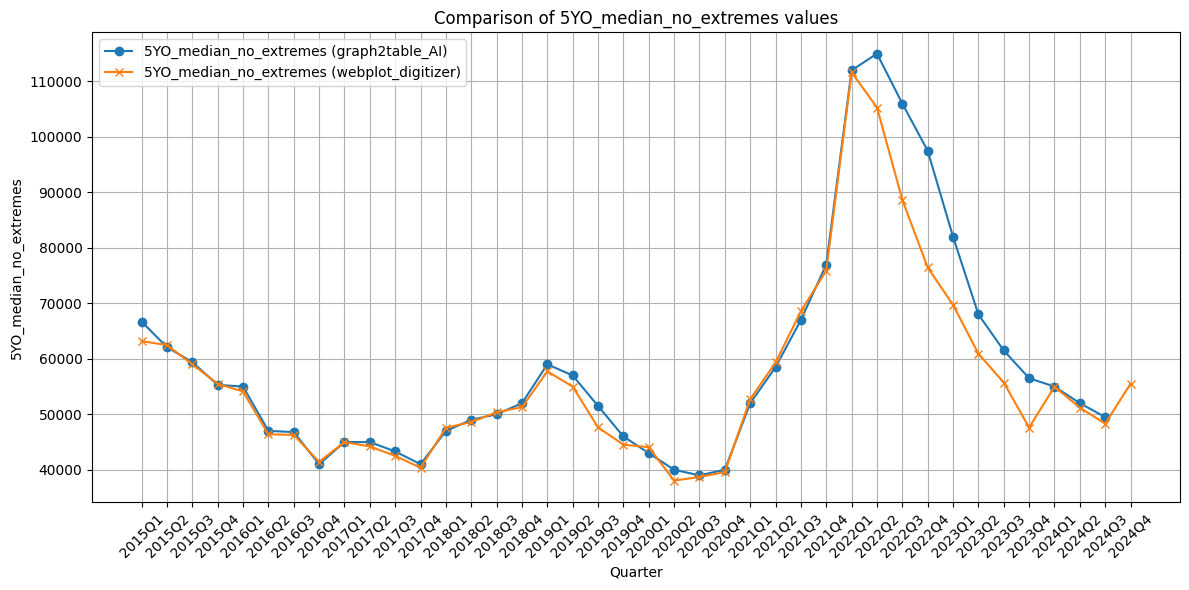

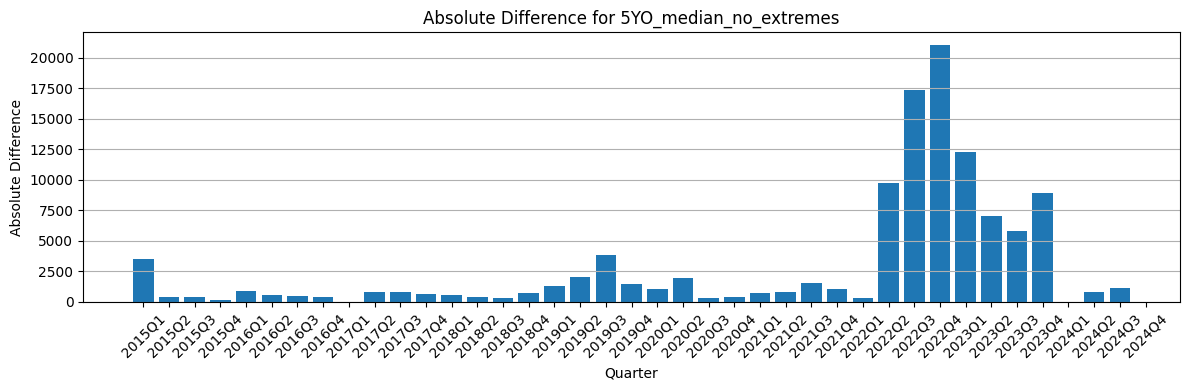

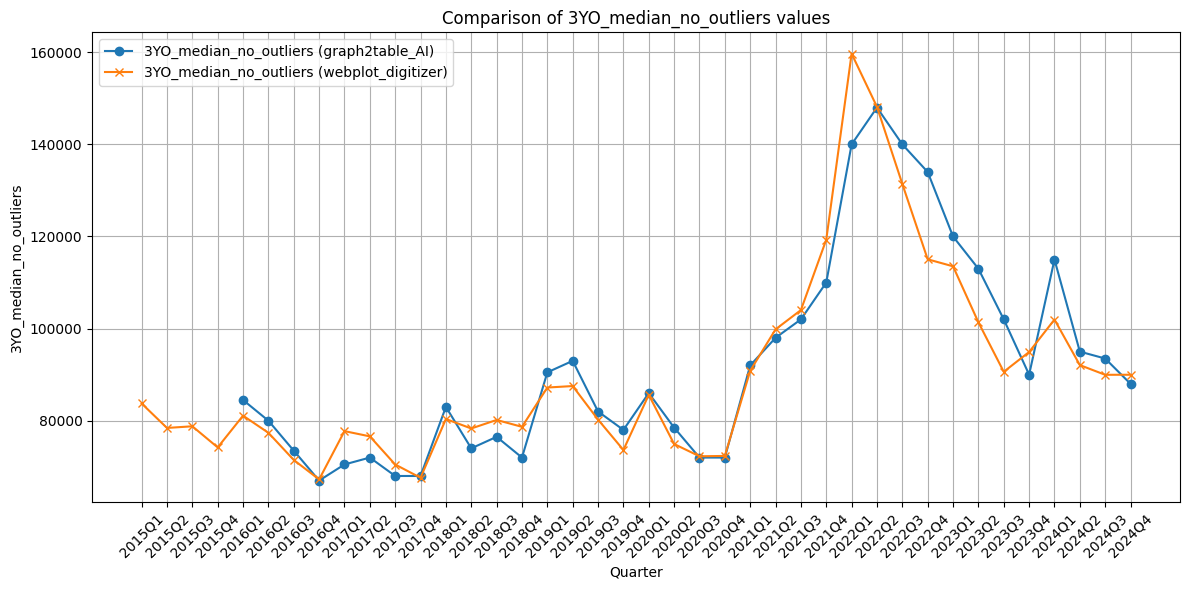

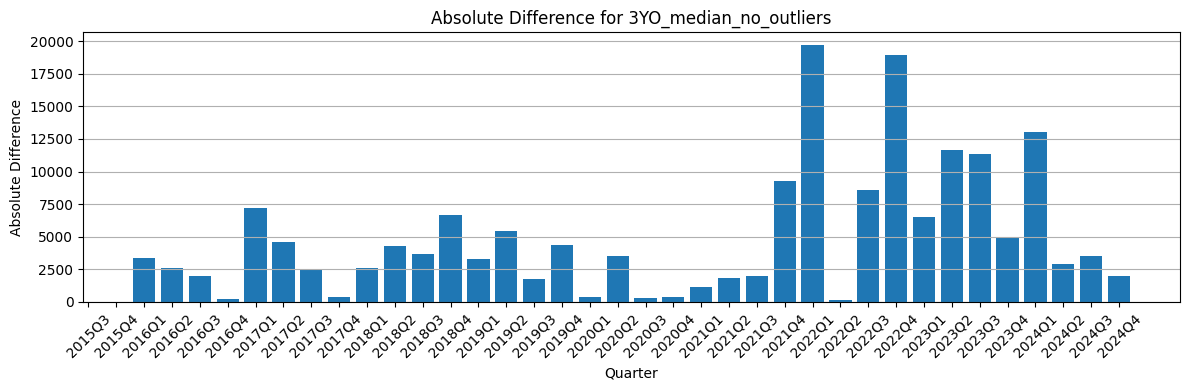

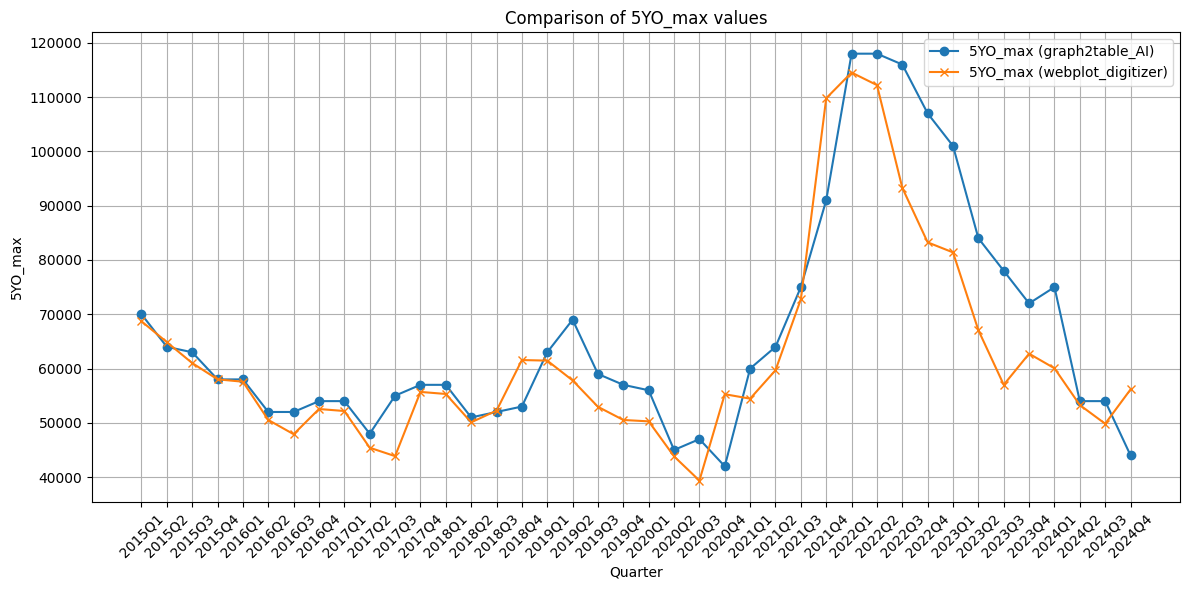

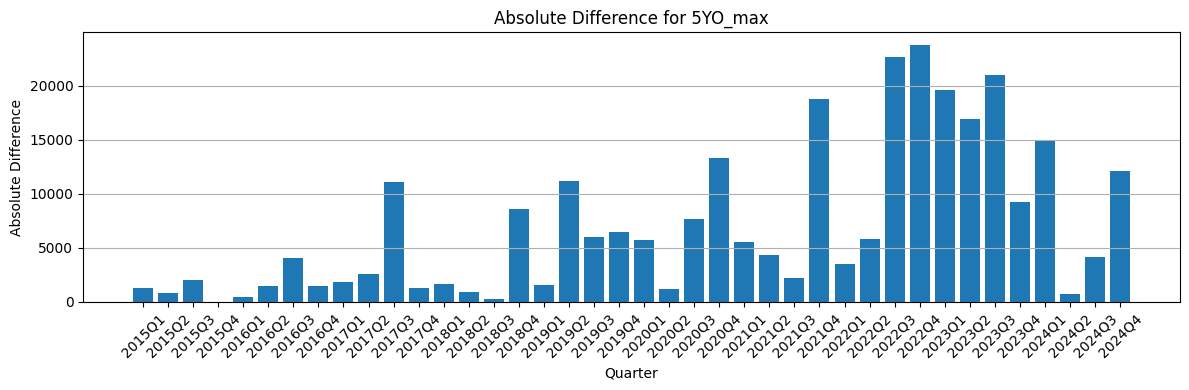

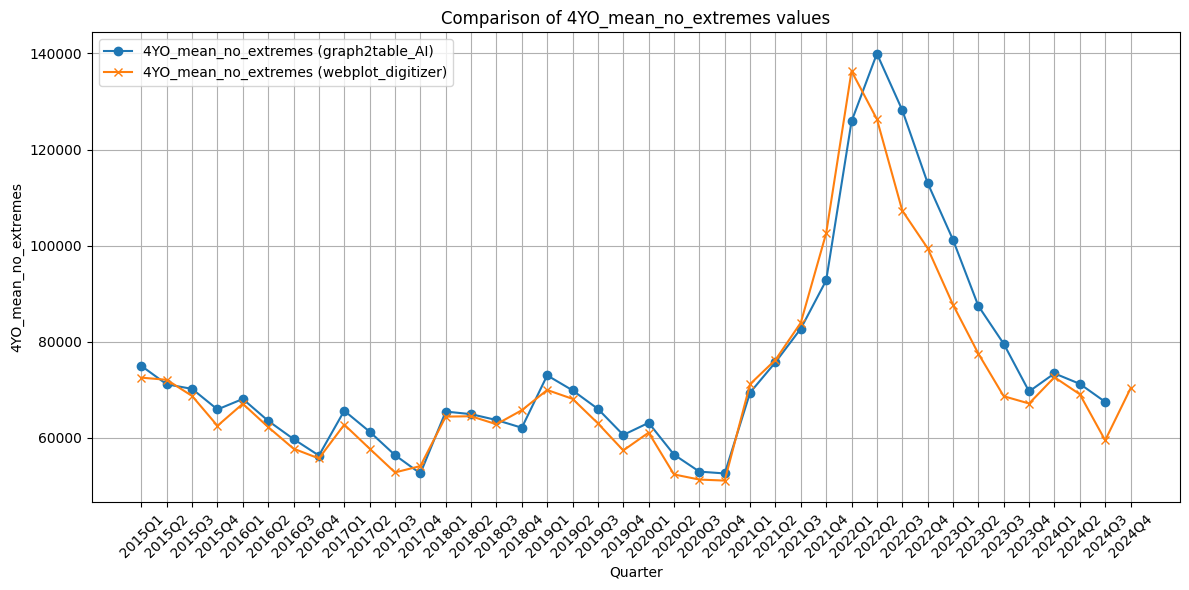

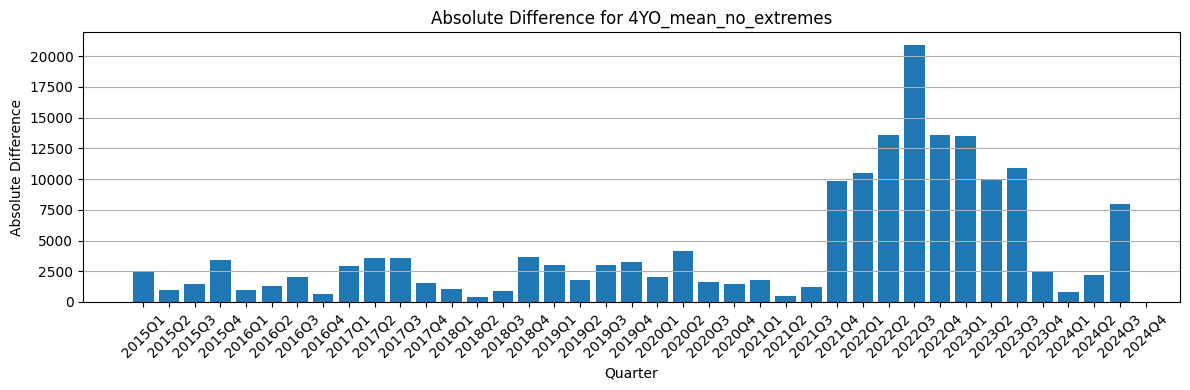

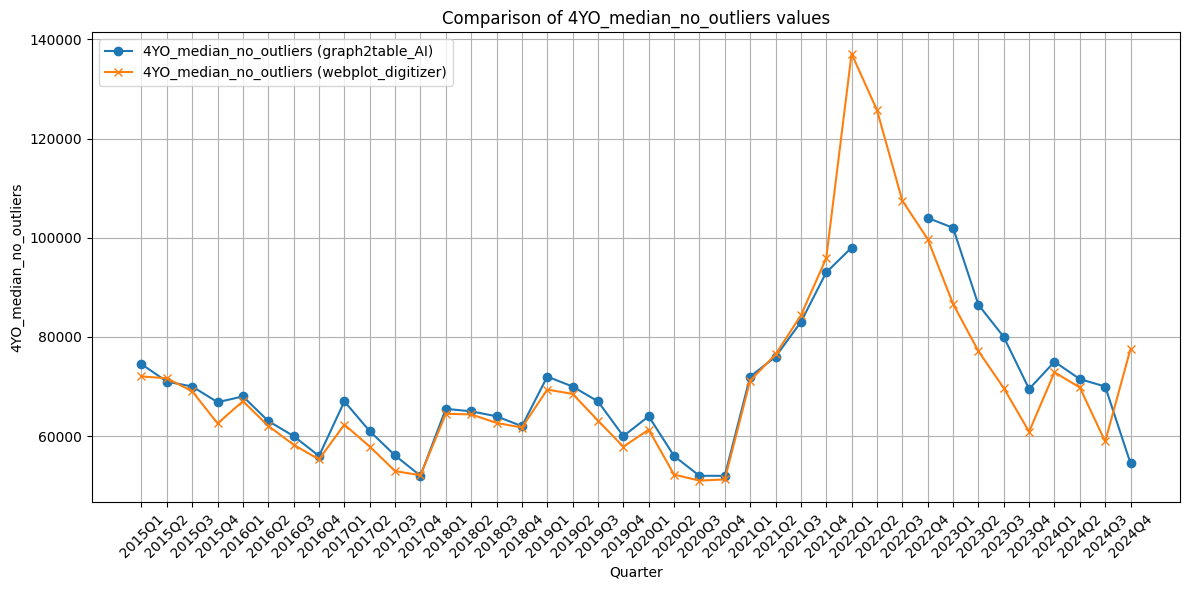

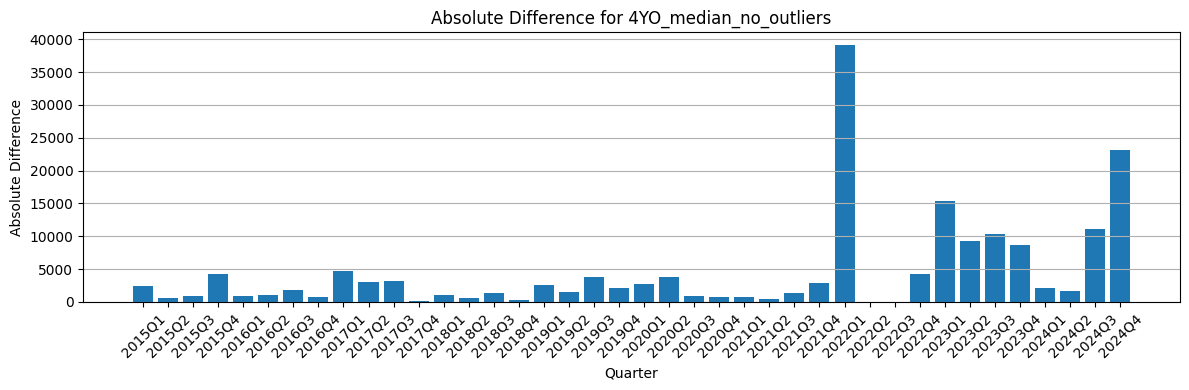

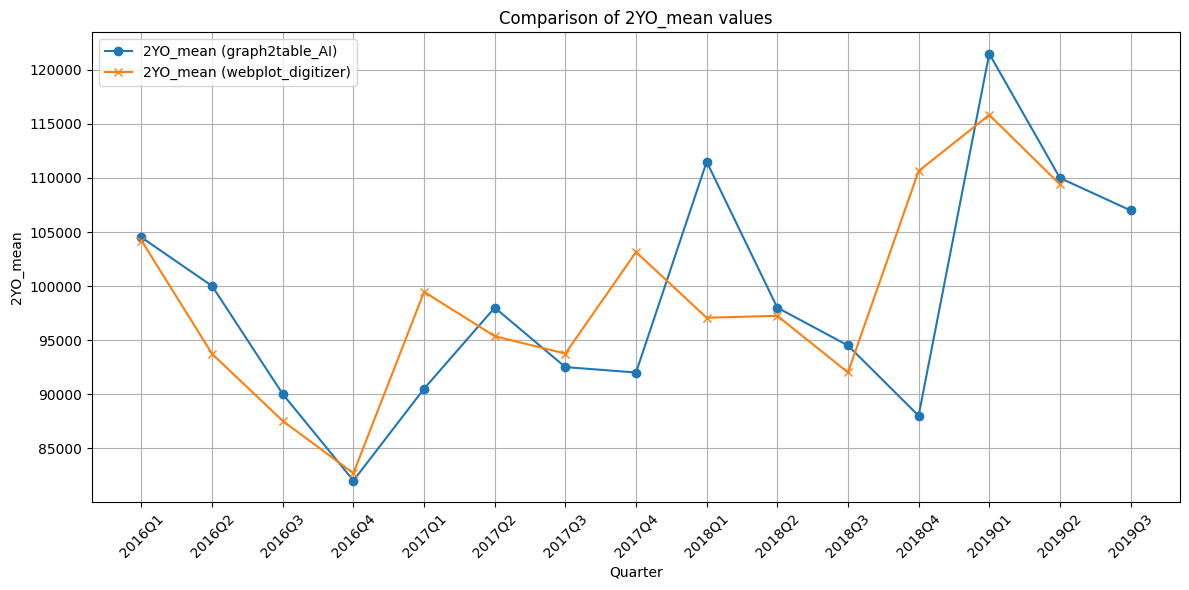

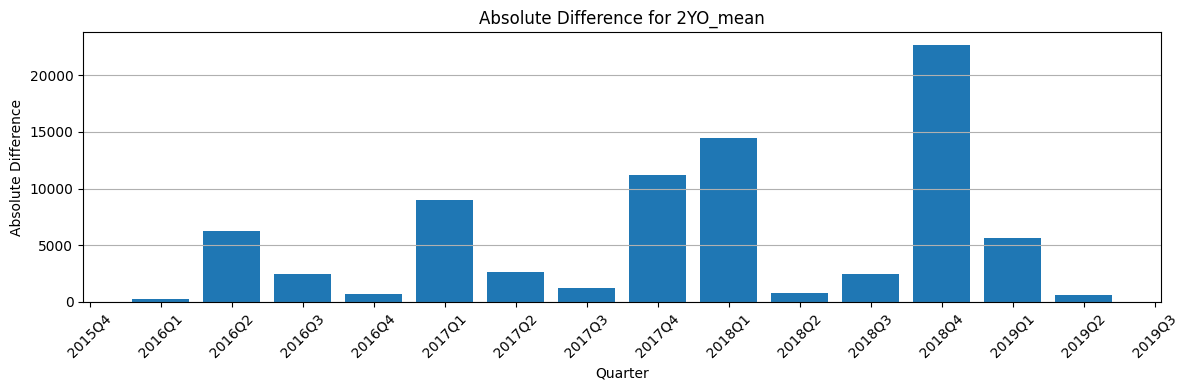

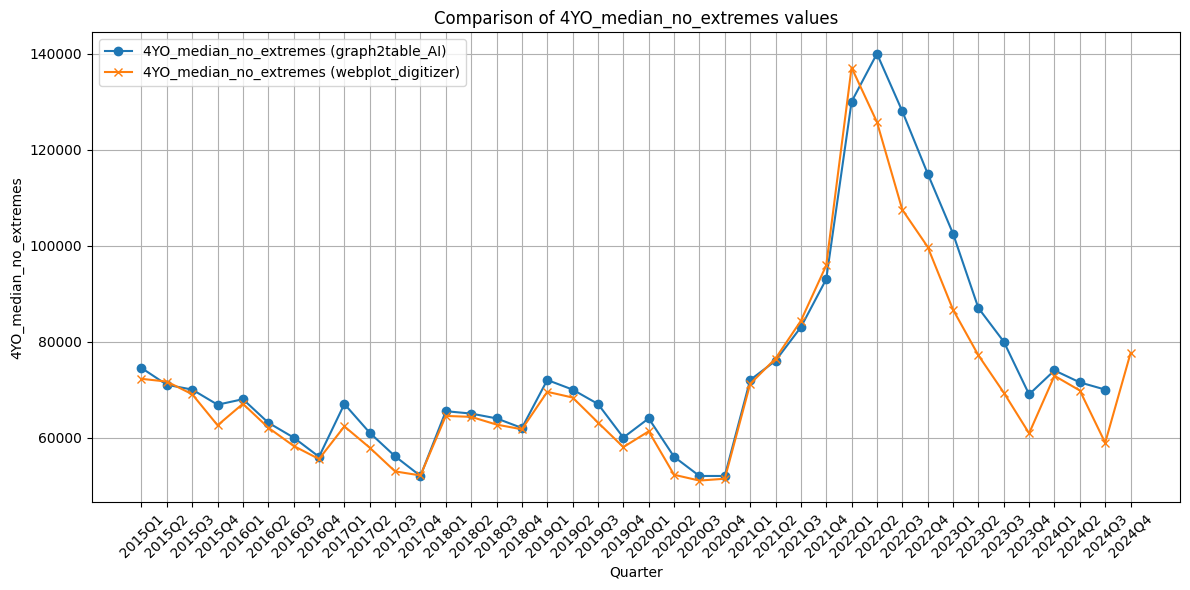

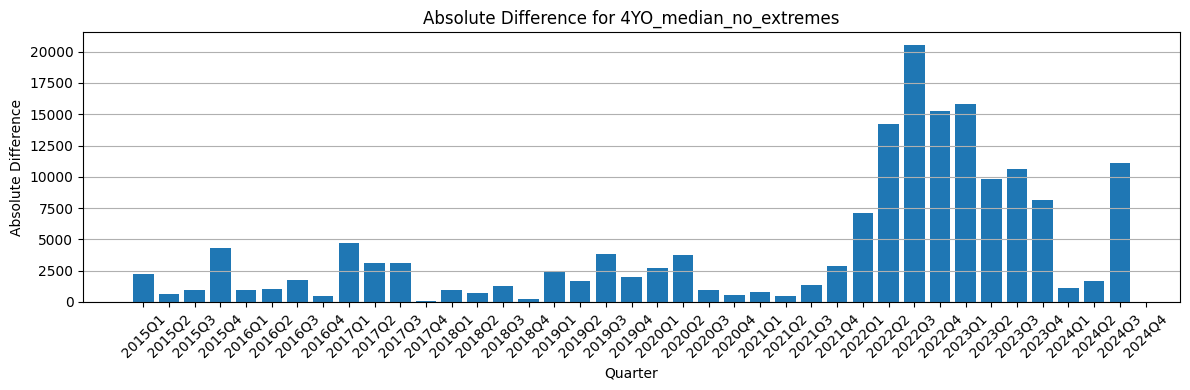

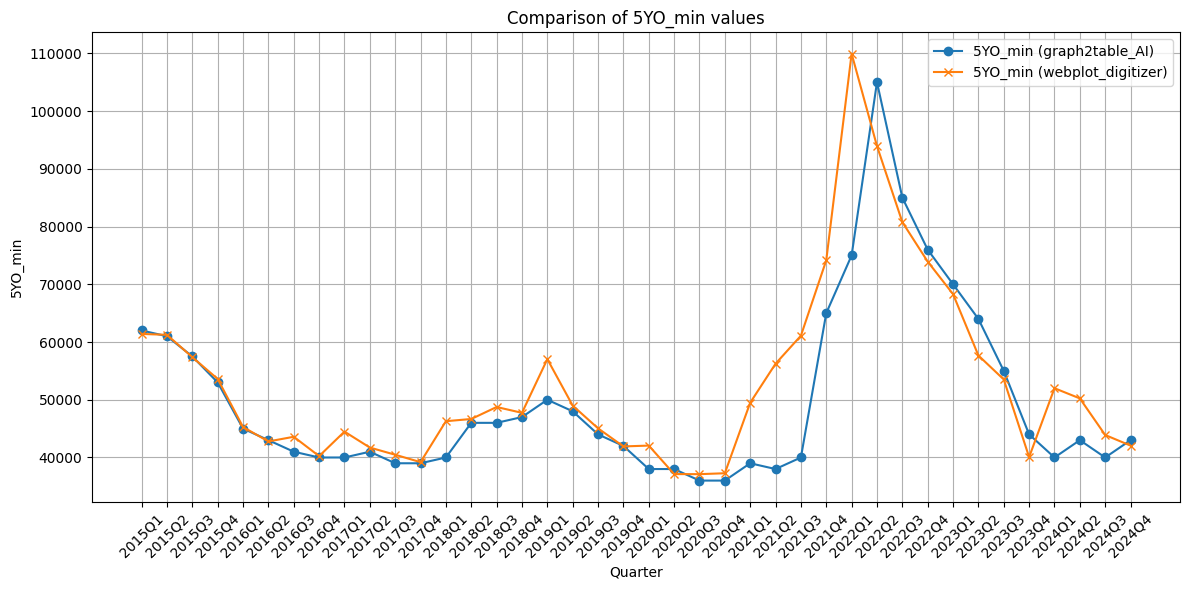

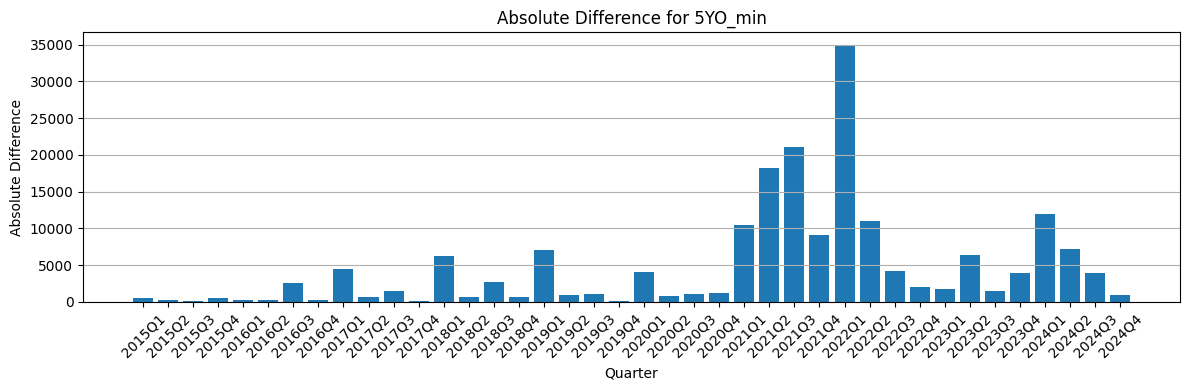

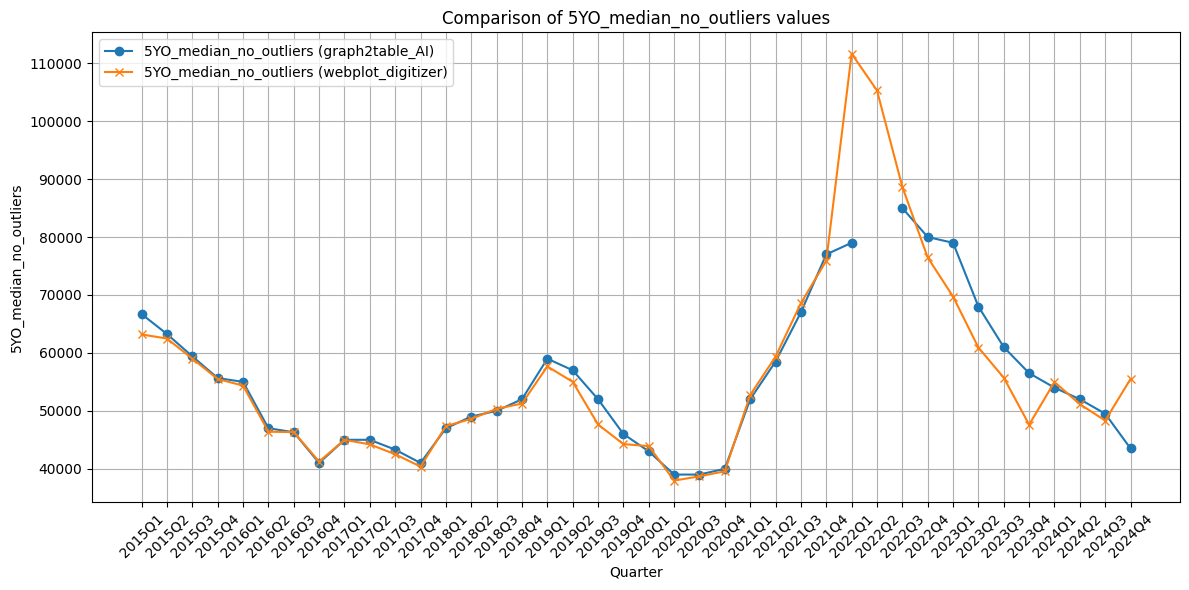

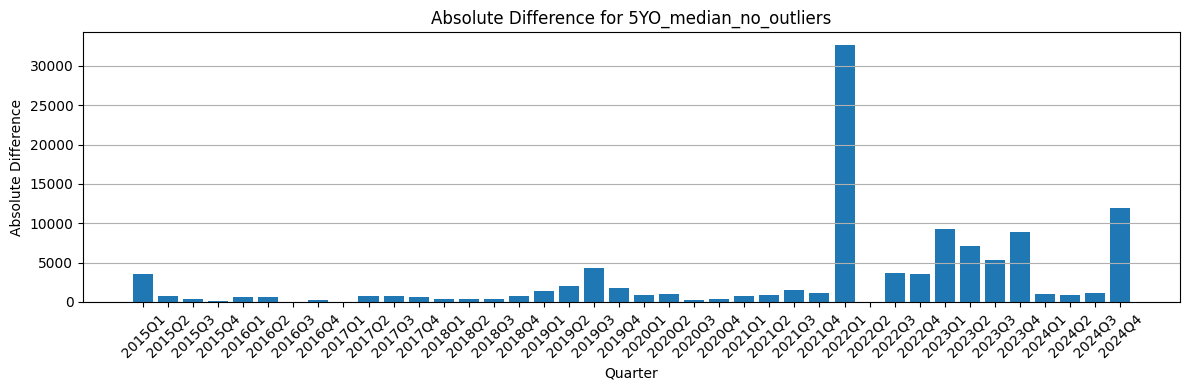

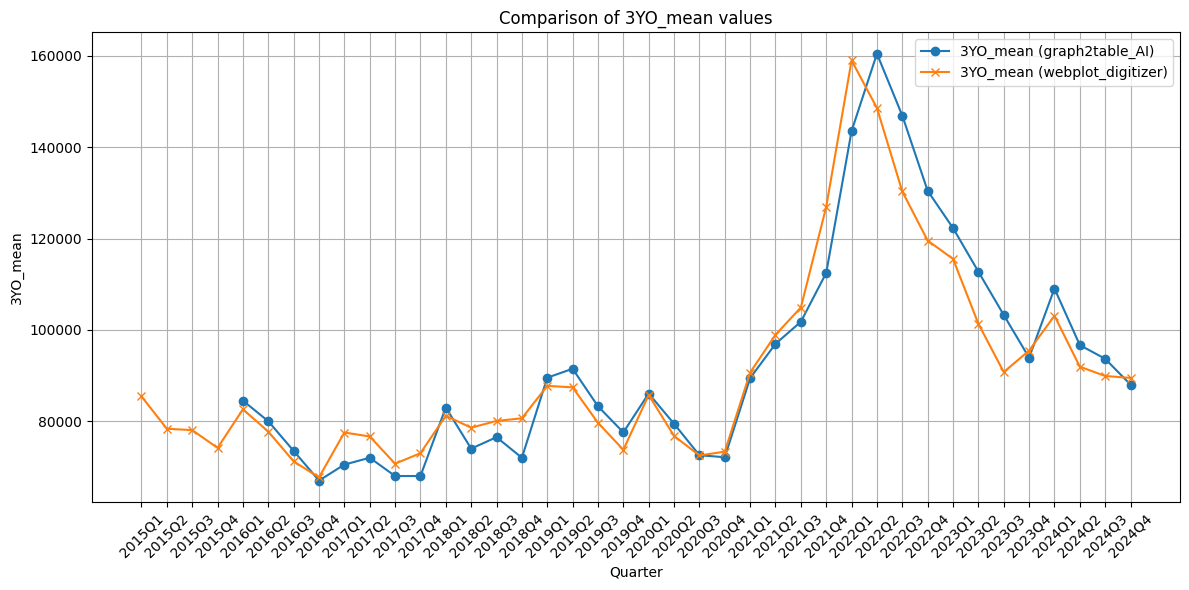

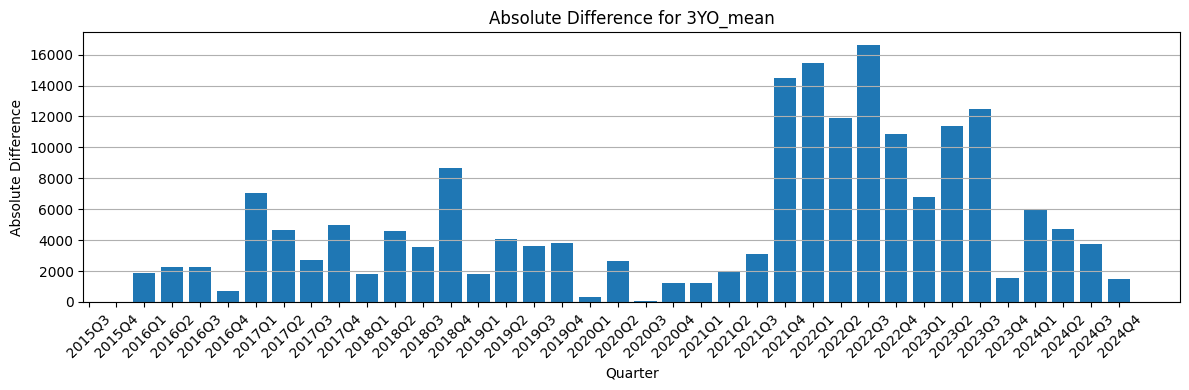

In [45]:
# Visualize differences for ALL common numeric columns
if len(comparison_results) > 0:
    # Get all common numeric columns (not just those with specific keywords)
    numeric_cols = []
    
    for col in common_cols:
        if col == 'Quarter':
            continue
        if pd.api.types.is_numeric_dtype(df1[col]) and pd.api.types.is_numeric_dtype(df2[col]):
            numeric_cols.append(col)
    
    if len(numeric_cols) > 0:
        print(f"Visualizing differences for {len(numeric_cols)} common numeric columns")
        
        # Iterate through all common numeric columns
        for col in numeric_cols:
            plt.figure(figsize=(12, 6))
            
            # Filter to common quarters and sort
            common_quarters = set(df1['Quarter']).intersection(set(df2['Quarter']))
            df1_filtered = df1[df1['Quarter'].isin(common_quarters)].sort_values('Quarter')
            df2_filtered = df2[df2['Quarter'].isin(common_quarters)].sort_values('Quarter')
            
            quarters = df1_filtered['Quarter']
            
            # Plot the values from both dataframes
            plt.plot(quarters, df1_filtered[col], label=f'{col} (graph2table_AI)', marker='o')
            plt.plot(quarters, df2_filtered[col], label=f'{col} (webplot_digitizer)', marker='x')
            
            plt.title(f'Comparison of {col} values')
            plt.xlabel('Quarter')
            plt.ylabel(col)
            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Plot the absolute differences
            abs_diff = np.abs(df1_filtered[col].values - df2_filtered[col].values)
            
            plt.figure(figsize=(12, 4))
            plt.bar(quarters, abs_diff)
            plt.title(f'Absolute Difference for {col}')
            plt.xlabel('Quarter')
            plt.ylabel('Absolute Difference')
            plt.xticks(rotation=45)
            plt.grid(True, axis='y')
            plt.tight_layout()
            plt.show()
    else:
        print("No common numeric columns found for visualization.")
else:
    print("No comparison results available for visualization.")

## Summary of Findings

This analysis has compared the values between `combined_stats.csv` and `webplot_extracted.csv`, examining:

1. Common and unique columns between the files
2. Quarter column consistency
3. Value differences for common numeric columns
4. Visualizations of the most significant differences for 'no_extremes' and 'no_outliers' columns

The tables and visualizations above show how closely the values match between the two datasets and highlight any significant discrepancies in the 'no_extremes' and 'no_outliers' columns.